In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pretty_midi

In [18]:
file_names = []
for composer_folder in os.listdir("Datasets/PS1"):
    tmp = []
    if not composer_folder.startswith('.'):
        composer_path = os.path.join("Datasets/PS1", composer_folder)
        
        for files in os.listdir(composer_path):
            tmp.append(os.path.join(composer_path, files))
        
        file_names.append(tmp)

1. **Note-Based Features**:

   - **Pitch Range**: Measure the span of pitches used in a composition. It can help capture the overall pitch range and register of the music.

   - **Melodic Intervals**: Calculate the distribution of melodic intervals (differences in pitch between consecutive notes). It reflects melodic 
   patterns and contour.
   
   - **Note Density**: Determine the average number of notes per unit of time. It indicates the level of musical activity or density.

2. **Chord-Based Features**:

   - **Chord Progressions**: Analyze the sequence of chords in a composition. Extract features like chord types, chord transitions, or chord progressions to capture harmonic characteristics.

   - **Chord Density**: Measure the average number of chords per unit of time. It indicates the harmonic complexity or density of the composition.

3. **Timing and Tempo Features**:

   - **Inter-Onset Intervals**: Calculate the time differences between consecutive note onsets. It represents the rhythmic patterns and tempo fluctuations.

4. **Melodic and Rhythmic Patterns**:

   - **N-grams**: Extract melodic or rhythmic patterns using n-grams. They represent recurring sequences of notes or rhythms.

   - **Motif Analysis**: Identify specific motifs or musical themes within the composition. It captures distinctive melodic or rhythmic patterns associated with a composer's style.

5. **Structural Features**:

   - **Section Analysis**: Divide the composition into sections (e.g., intro, verse, chorus) and analyze their durations, patterns, or transitions.
   
   - **Repetition Analysis**: Identify repeated musical sections or patterns. It captures structural and compositional elements.

In [36]:
midi_data = pretty_midi.PrettyMIDI(file_names[1][9])

# 1. Note-Based Features

- **Pitch Range**: Measure the span of pitches used in a composition. It can help capture the overall pitch range and register of the music.

- **Melodic Intervals**: Calculate the distribution of melodic intervals (differences in pitch between consecutive notes). It reflects melodic 
   patterns and contour.
   
- **Note Density**: Determine the average number of notes per unit of time. It indicates the level of musical activity or density.

## Pitch

In [37]:
def extract_pitch(midi_data):
    # Initalizing lists 
    pitches = []
    
    # Extracting pitch, velocity and note duration features
    for instrument in midi_data.instruments:
        
        # Loop through each note and add to the lists 
        for note in instrument.notes:
            pitches.append(note.pitch)
    
    return np.array(pitches)

In [44]:
pitches = extract_pitch(midi_data)
pitches

array([81, 85, 86, ..., 76, 73, 69])

## Pitch Range

 Measure the span of pitches used in a composition. It can help capture the overall pitch range and register of the music.

In [39]:
def extract_pitch_range(pitch_array):
    return np.max(pitch_array) - np.min(pitch_array)

In [46]:
extract_pitch_range(pitches)

67

## Melodic Intervals 

Calculate the distribution of melodic intervals (differences in pitch between consecutive notes). It reflects melodic patterns and contour.

In [91]:
def extract_melodic_intervals(pitch_array):
    intervals = []
    
    for note1, note2 in zip(pitch_array[:-1], pitch_array[1:]):
        interval = note2 - note1
        intervals.append(interval)
    
    return np.array(intervals)

In [85]:
def visualize_melodic_intervals(intervals):
    # Plot histogram of melodic intervals
    plt.hist(intervals, bins='auto', alpha=0.7)
    plt.xlabel('Melodic Interval')
    plt.ylabel('Count')
    plt.title('Distribution of Melodic Intervals')
    plt.grid(True)
    plt.show()

Size of Melodic Intervals Array:  [ 4  1  2 -7  2  2  1 -8  2  1]


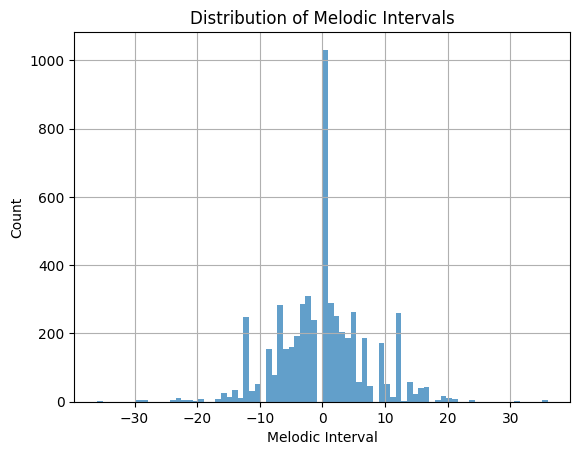

In [133]:
# Extract melodic intervals
mi = extract_melodic_intervals(pitches)

print("Size of Melodic Intervals Array: ",mi[0:10])

# Visualize melodic intervals
visualize_melodic_intervals(mi)

## Note Density

Determine the average number of notes per unit of time. It indicates the label of musical activity or density

In [132]:
# Print the note density
print("Note Density:", extract_note_density(midi_data, pitches))


Note Density: 22.123930657351575


# 2. Chord Based Features

 - **Chord Progressions**: Analyze the sequence of chords in a composition. Extract features like chord types, chord transitions, or chord progressions to capture harmonic characteristics.

 - **Chord Density**: Measure the average number of chords per unit of time. It indicates the harmonic complexity or density of the composition.

## Chord Progression

Analyze the sequence of chords in a composition. Extract features like chord types, chord transitions, or chord progressions to capture harmonic characteristics.


In [100]:
def extract_chord_progressions(midi_data):    
    # Extract chord progressions
    chord_progressions = []
    for instrument in midi_data.instruments:
        for note in instrument.notes:
            # Find the chord at each note's start time
            chord = pretty_midi.note_number_to_name(note.pitch)
            chord_progressions.append(chord)
    
    return chord_progressions

In [101]:
def visualize_chord_progressions(chord_progressions):
    # Count the occurrences of each chord
    chord_counts = {}
    for chord in chord_progressions:
        if chord in chord_counts:
            chord_counts[chord] += 1
        else:
            chord_counts[chord] = 1
    
    # Sort the chords by their occurrence count
    sorted_chords = sorted(chord_counts.items(), key=lambda x: x[1], reverse=True)
    
    # Extract chord labels and occurrence counts
    chords = [chord[0] for chord in sorted_chords]
    counts = [chord[1] for chord in sorted_chords]
    
    # Plot the chord progression frequencies
    plt.figure(figsize=(12, 6))
    plt.bar(chords, counts)
    plt.xlabel('Chords')
    plt.ylabel('Frequency')
    plt.title('Chord Progression Frequencies')
    plt.xticks(rotation=45)
    plt.show()

In [91]:
def compile_chord_numerical(chord_progressions):
    # Create a dictionary to map chord names to numerical representations
    chord_dictionary = {}

    # Iterate over the chord progressions
    numerical_representations = []
    for chord in chord_progressions:
        # Check if the chord is already in the dictionary
        if chord not in chord_dictionary:
            # If not, add it to the dictionary with a new numerical representation
            chord_dictionary[chord] = len(chord_dictionary)
        
        # Store the numerical representation of the chord
        numerical_rep = chord_dictionary[chord]
        numerical_representations.append(numerical_rep)
    
    # Convert the list to a NumPy array
    numerical_array = np.array(numerical_representations)
    
    return numerical_array

Chord Progressions:    5559


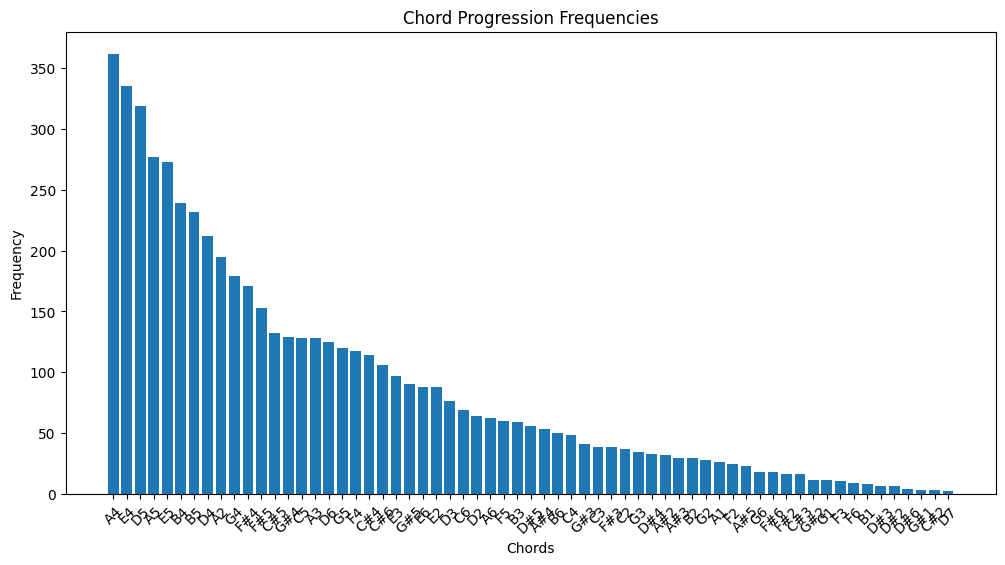

In [104]:
# Example usage
chord_progressions = extract_chord_progressions(midi_data)

print("Chord Progressions:   ", len(chord_progressions))

# num_arr = analyze_chords_numerical(chord_progressions)
# print(num_arr)

visualize_chord_progressions(chord_progressions)

## Chord Density

Measure the average number of chords per unit of time. It indicates the harmonic complexity or density of the composition.

Chord Density: 3.1808550549370267
Inter Chord intervals:  867


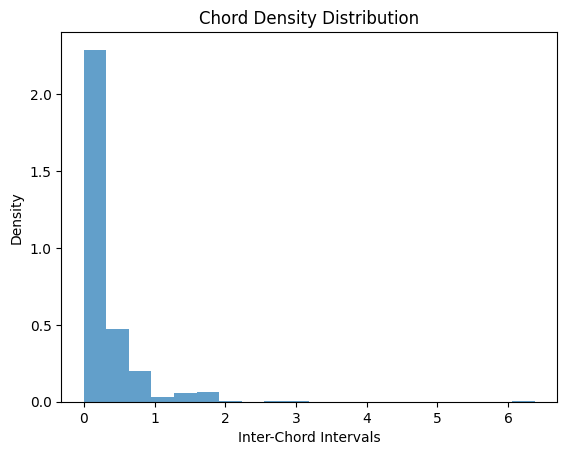

In [97]:
# Select the instrument track for analysis (e.g., piano)
instrument = midi_data.instruments[0]

# Extract chord onsets
chord_onsets = [note.start for note in instrument.notes]

# Calculate inter-chord intervals
inter_chord_intervals = np.diff(chord_onsets)

# Calculate chord density (chords per unit of time)
chord_density = len(chord_onsets) / midi_data.get_end_time()

# Print chord density
print("Chord Density:", chord_density)
print("Inter Chord intervals: ", len(inter_chord_intervals))

# Visualize chord density
plt.hist(inter_chord_intervals, bins=20, density=True, alpha=0.7)
plt.xlabel('Inter-Chord Intervals')
plt.ylabel('Density')
plt.title('Chord Density Distribution')
plt.show()

# 3. Timing and Temp Features

   - **Inter-Onset Intervals**: Calculate the time differences between consecutive note onsets. It represents the rhythmic patterns and tempo fluctuations.
   

## Inter-Onset Intervals

 Calculate the time differences between consecutive note onsets. It represents the rhythmic patterns and tempo fluctuations.

In [134]:
def extract_inter_onset_intervals(midi_data):
    iois = []
    prev_onset = 0
    
    for instrument in midi_data.instruments:
        
        sorted_notes = sorted(instrument.notes, key=lambda note: note.start)
        
        for note in sorted_notes:
            ioi = note.start - prev_onset
            iois.append(ioi)
            prev_onset = note.start
    
    return np.array(iois)
            

Inter Onset Intervals:   -248.97823573333335


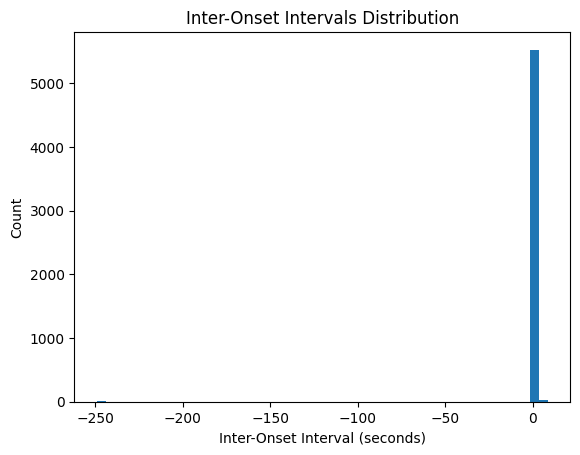

In [135]:
npiois = extract_inter_onset_intervals(midi_data)
print("Inter Onset Intervals:  ", np.min(npiois))

# Visualize inter-onset intervals
plt.hist(npiois, bins=50)
plt.xlabel('Inter-Onset Interval (seconds)')
plt.ylabel('Count')
plt.title('Inter-Onset Intervals Distribution')
plt.show()

# 4. Melodic and Rhythmic Patterns:

   - **N-grams**: Extract melodic or rhythmic patterns using n-grams. They represent recurring sequences of notes or rhythms.
   
   - **Motif Analysis**: Identify specific motifs or musical themes within the composition. It captures distinctive melodic or rhythmic patterns associated with a composer's style.

## N-grams

Extract melodic or rhythmic patterns using n-grams. They represent recurring sequences of notes or rhythms.


In [116]:
from nltk import ngrams

# Define the number of consecutive notes to consider for n-grams
n = 4

# Extract notes from the MIDI file
notes = []
for instrument in midi_data.instruments:
    for note in instrument.notes:
        notes.append(note.pitch)

# Create n-grams
note_ngrams = list(ngrams(notes, n))

# Count the occurrence of each n-gram
ngram_counts = {}
for ngram in note_ngrams:
    ngram = tuple(ngram)
    if ngram in ngram_counts:
        ngram_counts[ngram] += 1
    else:
        ngram_counts[ngram] = 1

print("Note N-grams: ", len(note_ngrams))
print("N-gram Counts: ", len(ngram_counts))

# # Visualize the n-gram counts
# ngram_labels = [' '.join(map(str, ngram)) for ngram in ngram_counts.keys()]
# ngram_values = list(ngram_counts.values())

# plt.figure(figsize=(12, 6))
# plt.bar(ngram_labels, ngram_values)
# plt.xticks(rotation=90)
# plt.xlabel('N-gram')
# plt.ylabel('Frequency')
# plt.title(f'N-gram Frequencies (n={n})')
# plt.tight_layout()
plt.show()

Note N-grams:  3262
N-gram Counts:  1724


# 5. Structural Features

   - **Section Analysis**: Divide the composition into sections (e.g., intro, verse, chorus) and analyze their durations, patterns, or transitions.
   

## Section Analysis

Divide the composition into sections (e.g., intro, verse, chorus) and analyze their durations, patterns, or transitions.

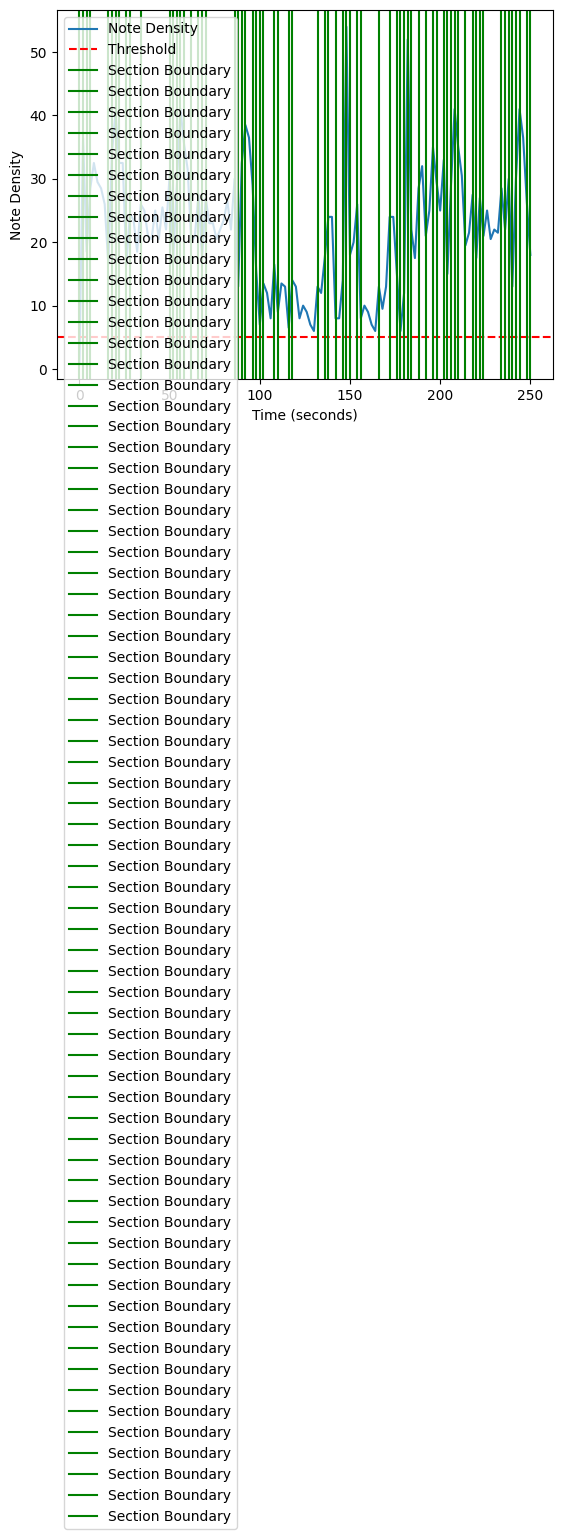

In [14]:
# Calculate note density per time window
time_window = 2.0  # Time window in seconds
note_densities = []
current_time = 0.0
while current_time < midi_data.get_end_time():
    notes_in_window = []
    for instrument in midi_data.instruments:
        notes_in_window.extend(instrument.notes)
    notes_in_window = [note for note in notes_in_window if note.start >= current_time and note.start < current_time + time_window]
    note_density = len(notes_in_window) / time_window
    note_densities.append(note_density)
    current_time += time_window

# Determine section boundaries based on note density
threshold = 5.0  # Adjust the threshold as needed
section_boundaries = [0]
for i in range(1, len(note_densities)):
    if abs(note_densities[i] - note_densities[i-1]) > threshold:
        section_boundaries.append(i * time_window)

# Visualize the section boundaries
fig, ax = plt.subplots()
ax.plot(np.arange(len(note_densities)) * time_window, note_densities, label='Note Density')
ax.axhline(threshold, color='r', linestyle='--', label='Threshold')
for boundary in section_boundaries:
    ax.axvline(boundary, color='g', linestyle='-', label='Section Boundary')
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Note Density')
ax.legend()
plt.show()

# Rough Area

--- Trio in E-flat major_OP38_2113_jb38_2.mid ---
Number of instruments: 3
Duration: 330.9 seconds


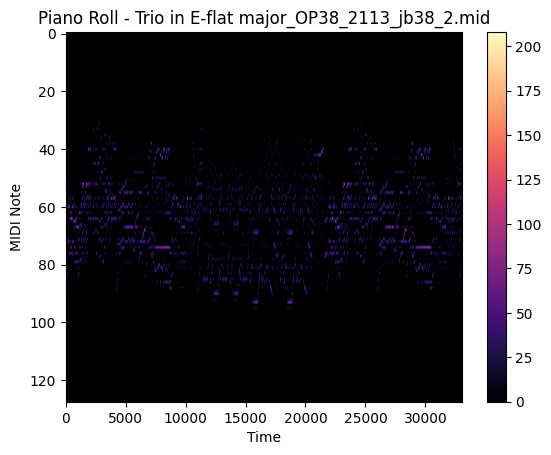

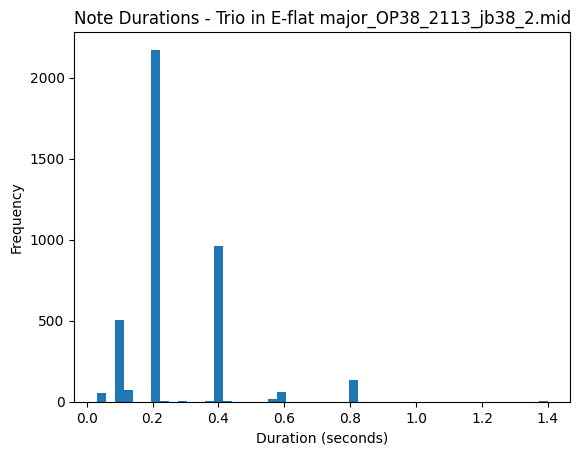

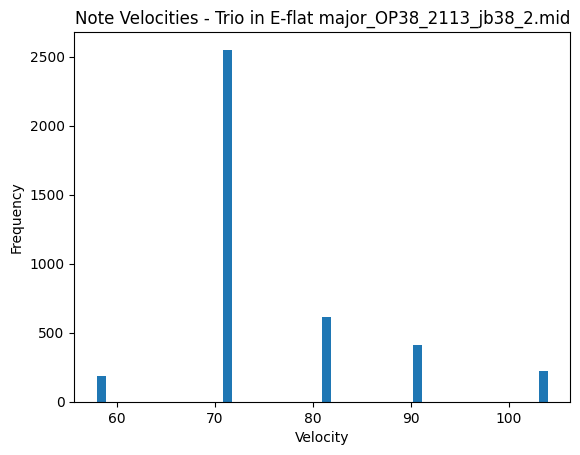

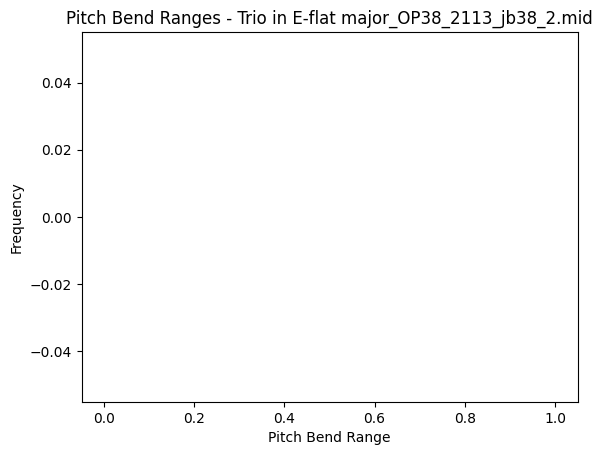

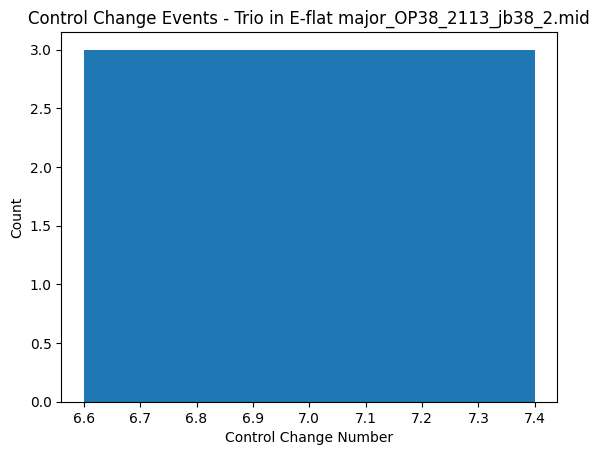

--- Piano Quartet No 1 in G minor_OP25_2148_br25m1.mid ---
Number of instruments: 9
Duration: 743.0003943333335 seconds


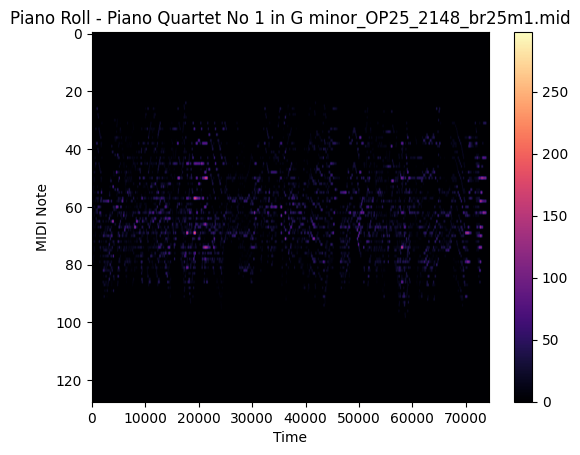

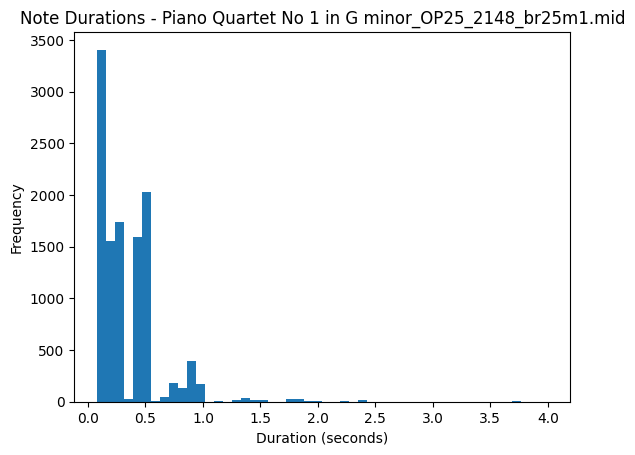

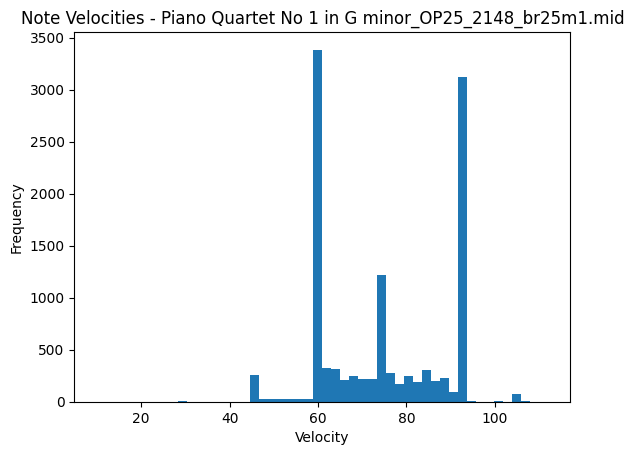

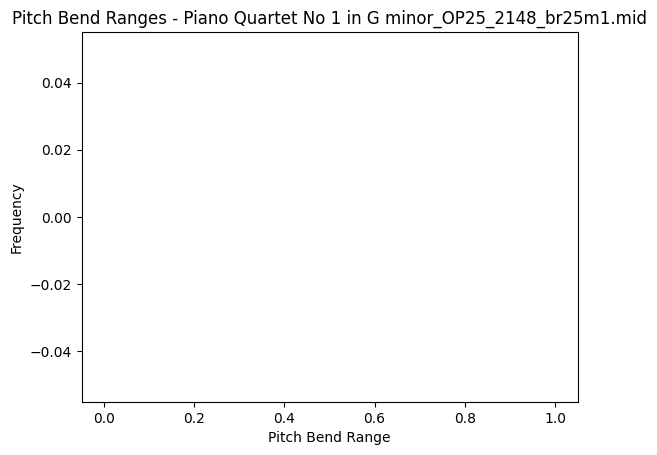

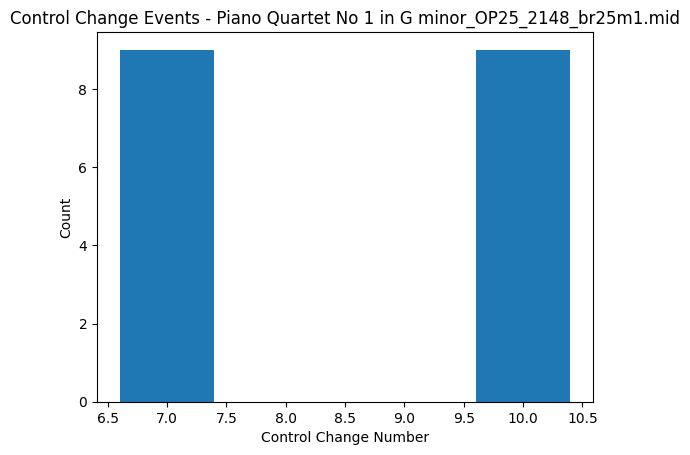

--- String Quartet in C minor_OP51NO1_2138_br51n1m2.mid ---
Number of instruments: 8
Duration: 411.45852166666674 seconds


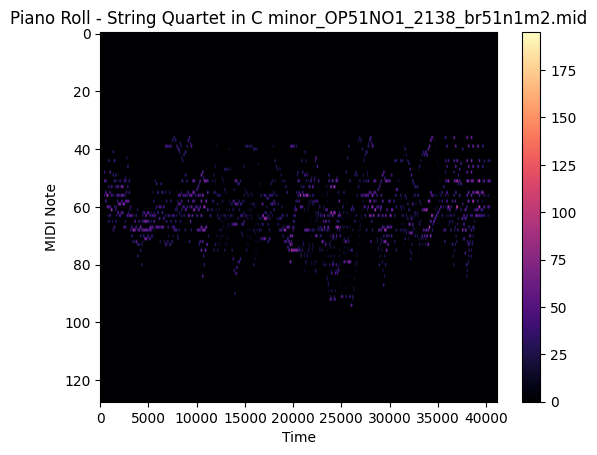

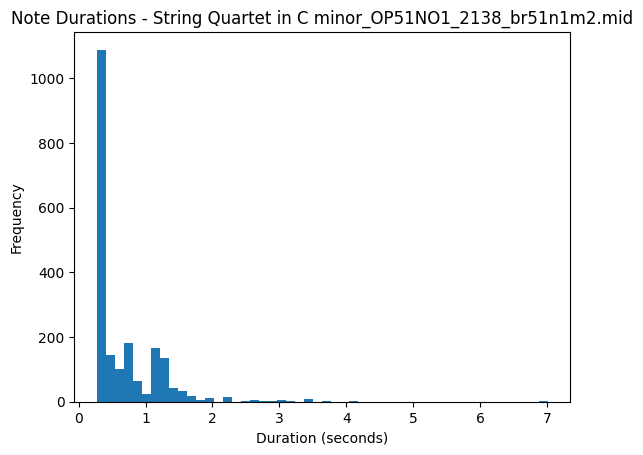

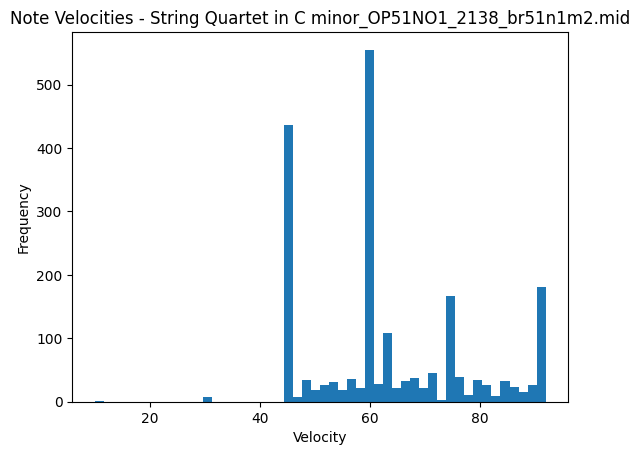

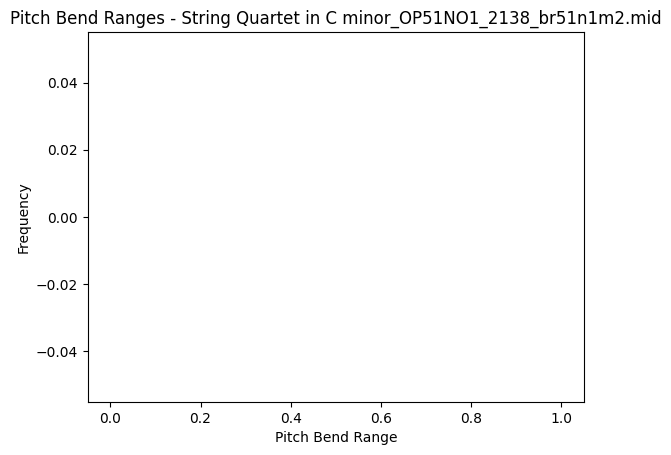

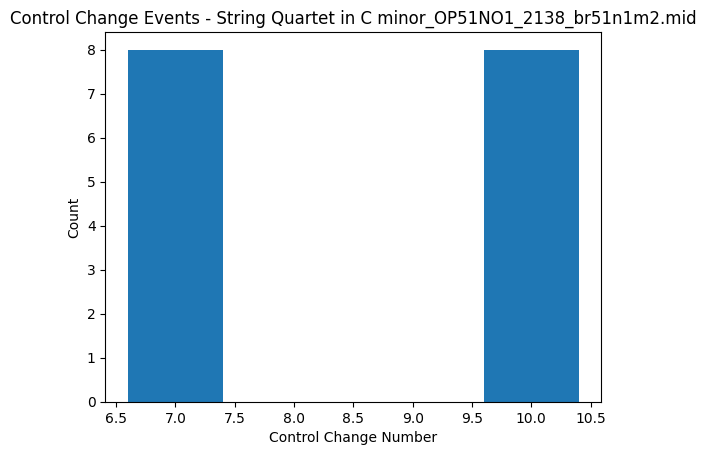

--- Horn Trio in E-flat major_OP40_2159_bra40_2.mid ---
Number of instruments: 4
Duration: 448.7177419791667 seconds


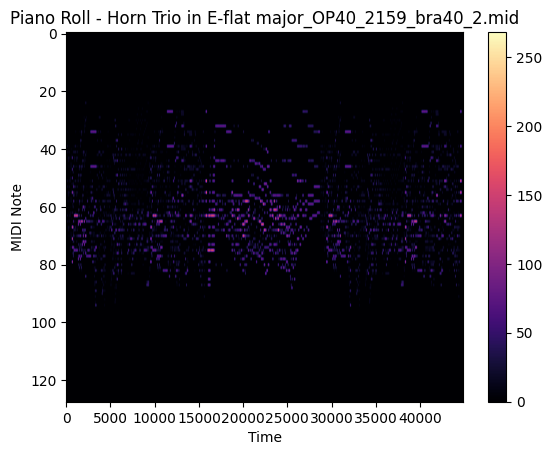

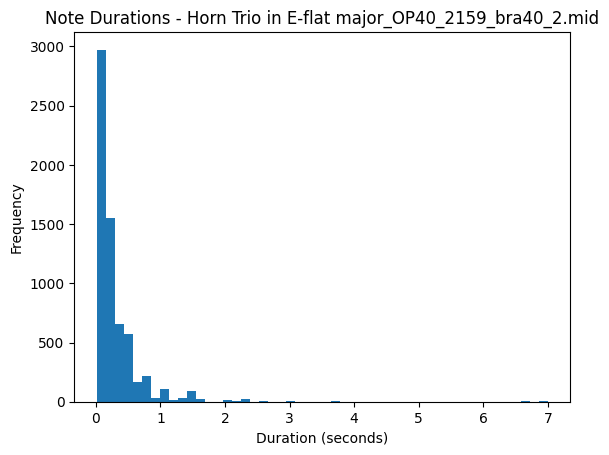

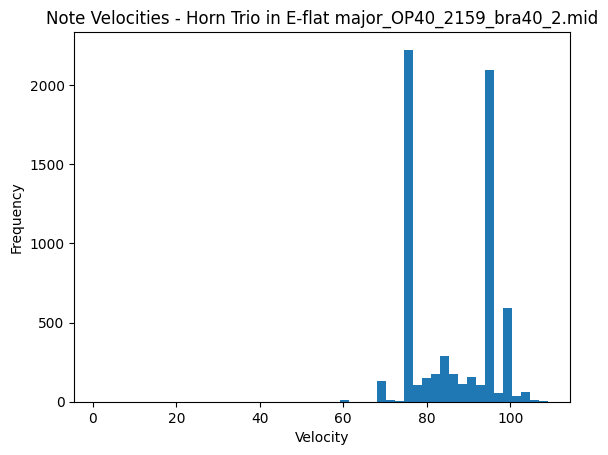

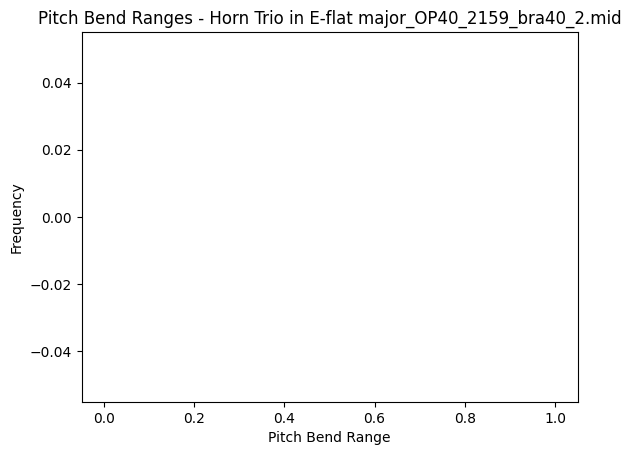

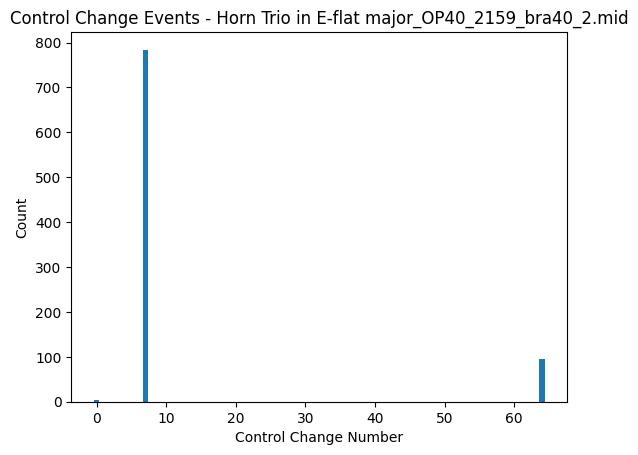

--- Piano Quartet No 1 in G minor_OP25_2151_br25m4.mid ---
Number of instruments: 9
Duration: 479.08279600000003 seconds


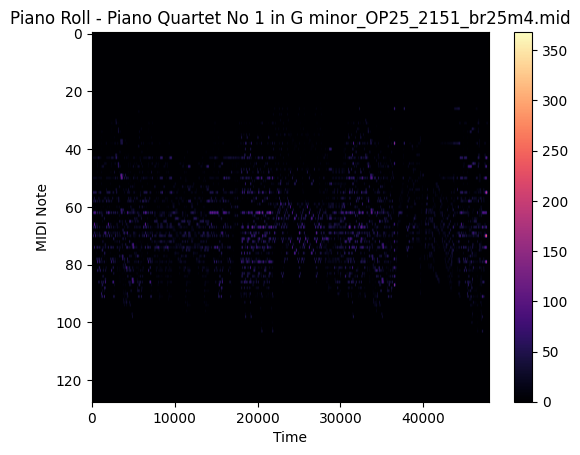

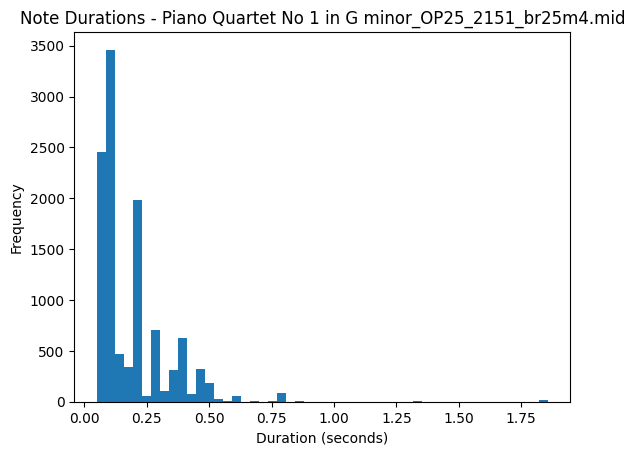

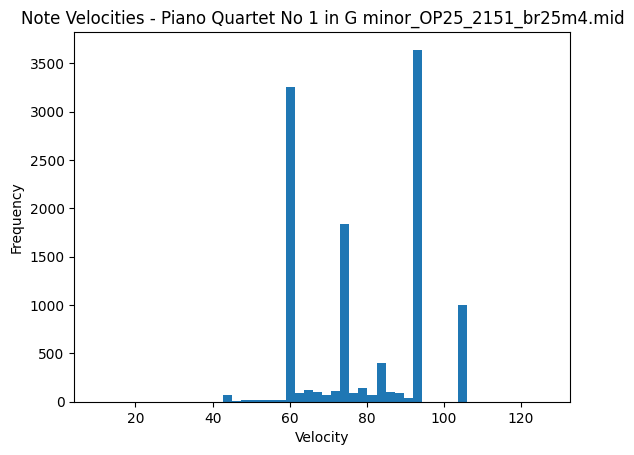

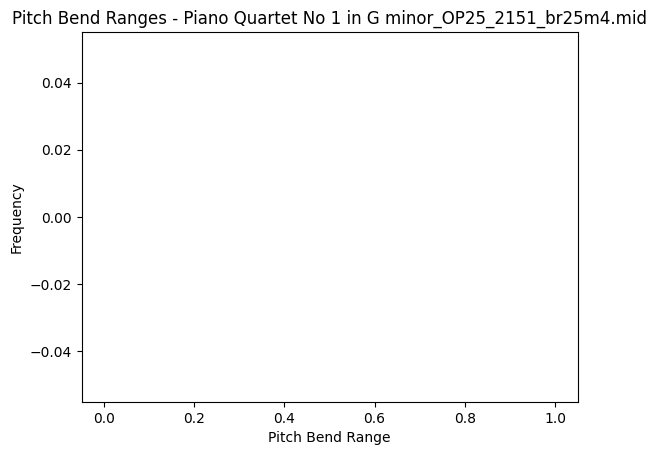

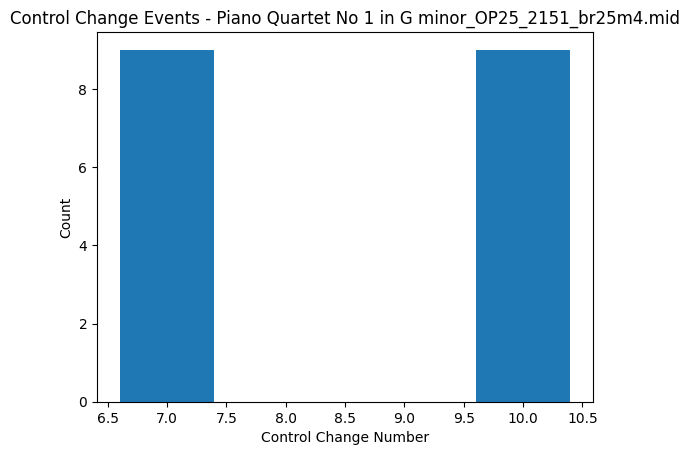

--- String Sextet No 1 in B-flat major_OP18_2157_br18m4.mid ---
Number of instruments: 13
Duration: 511.80022400000024 seconds


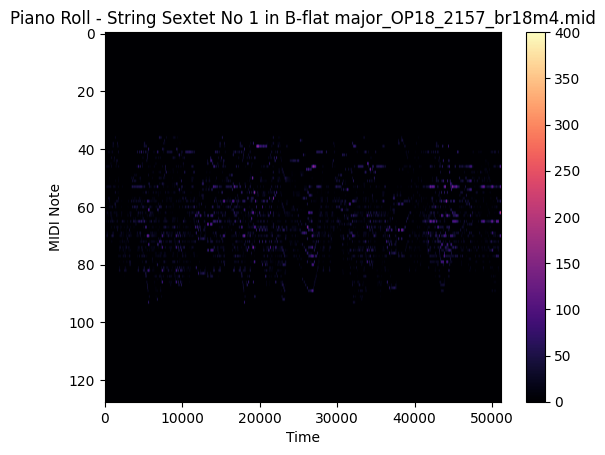

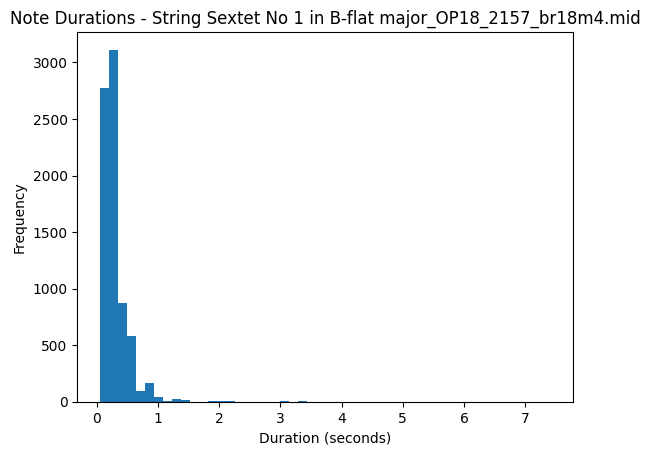

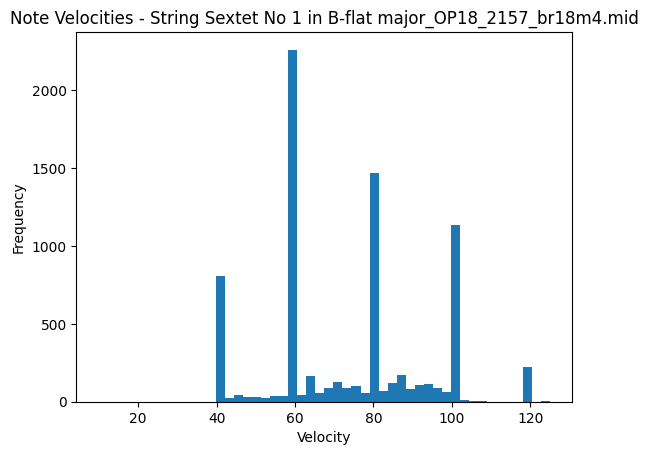

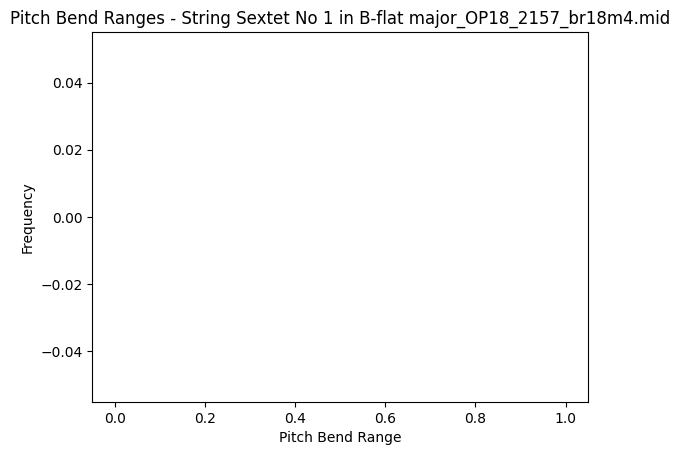

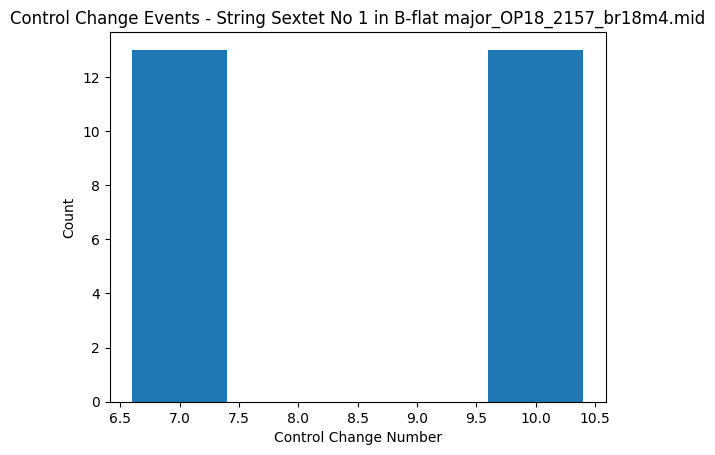

--- String Sextet No 2 in G major_OP36_2147_br36m4.mid ---
Number of instruments: 12
Duration: 560.2668743333335 seconds


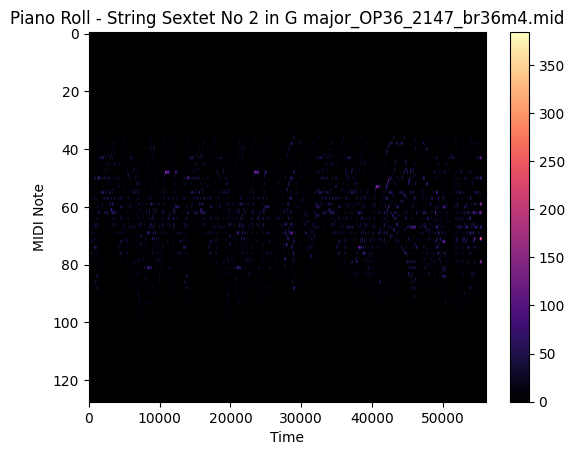

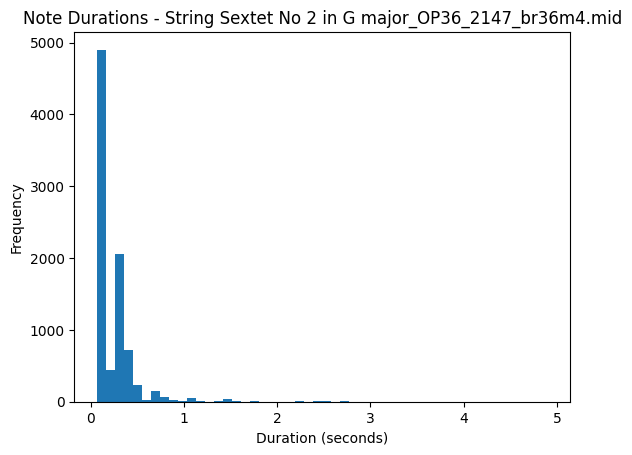

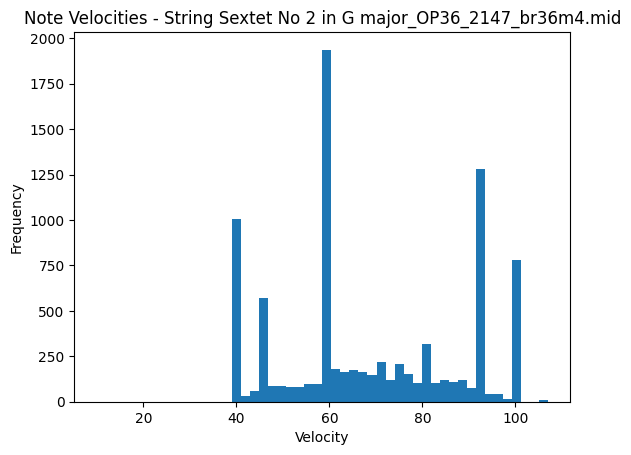

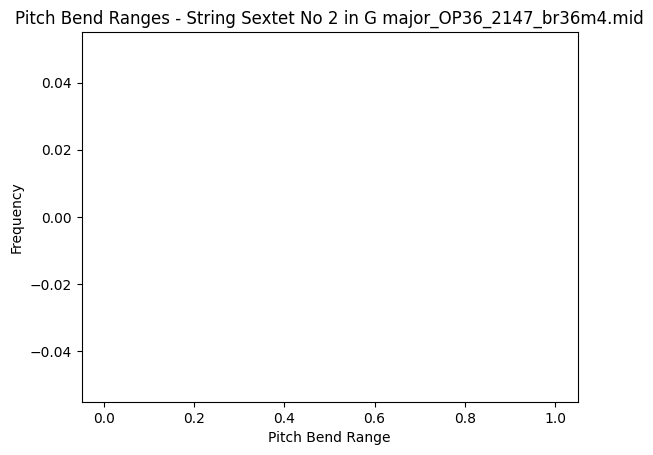

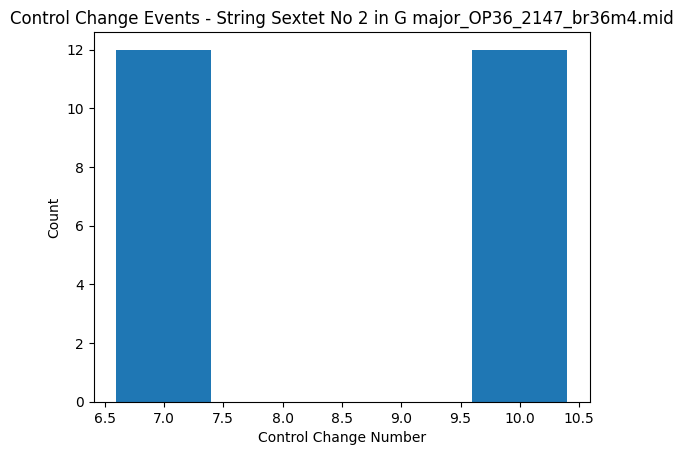

--- Clarinet Sonata No 1 in F minor_OP120NO1_2119_brahms_sonata_opus_120-4.mid ---
Number of instruments: 4
Duration: 222.13333333333333 seconds


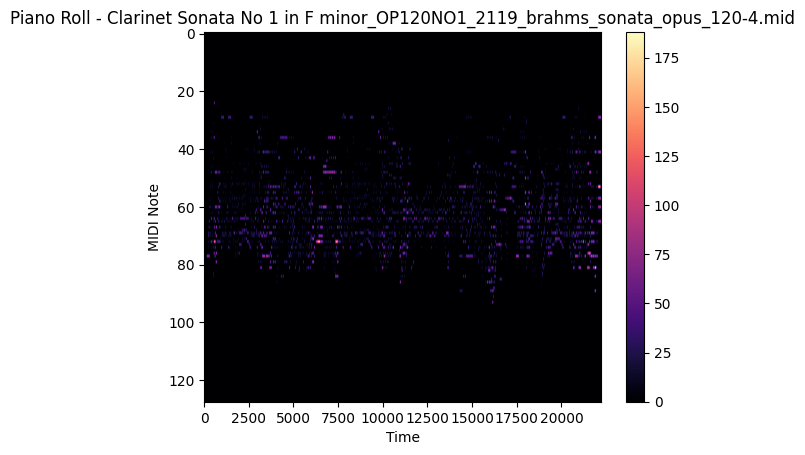

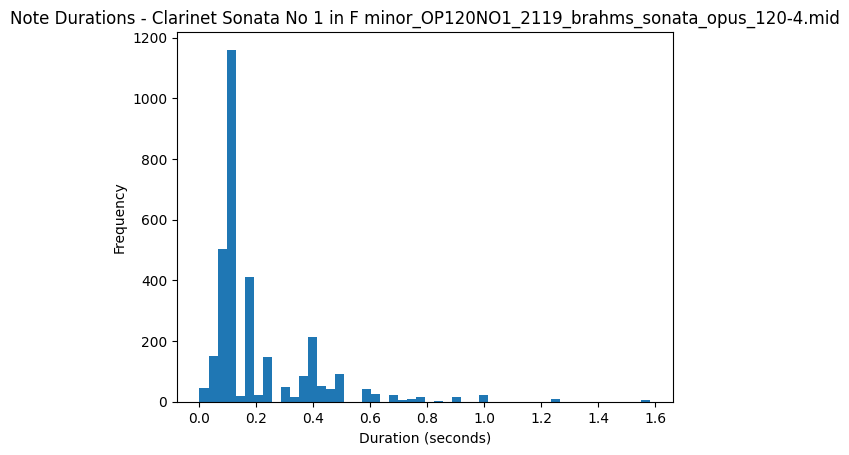

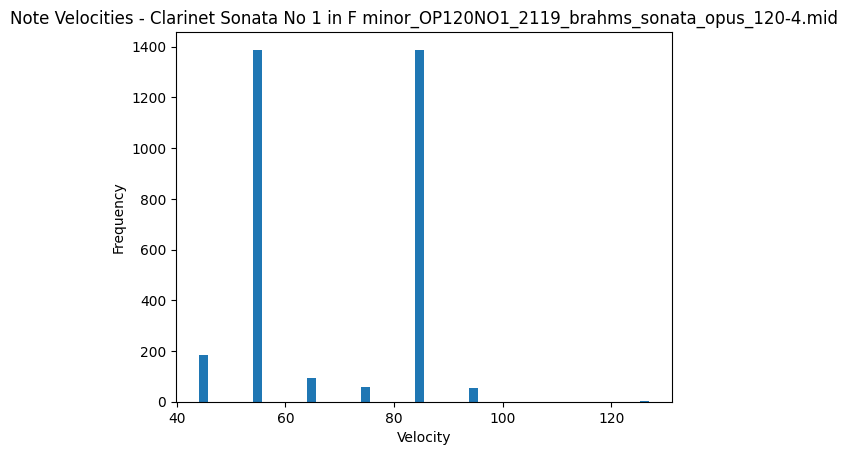

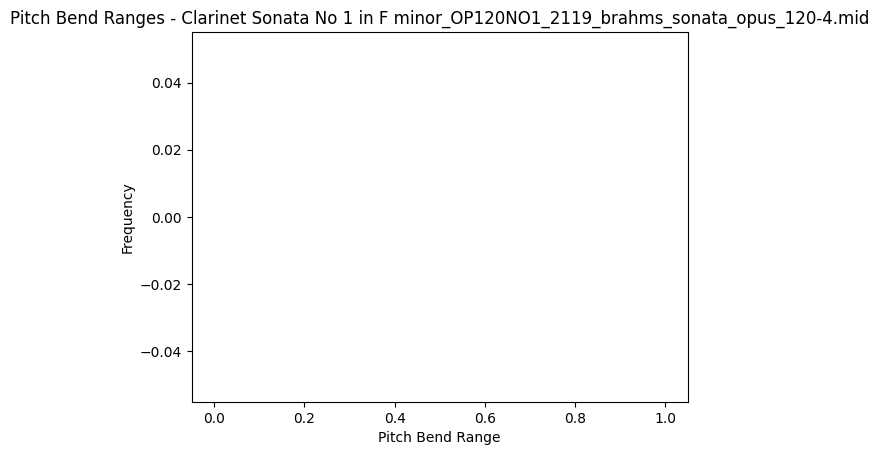

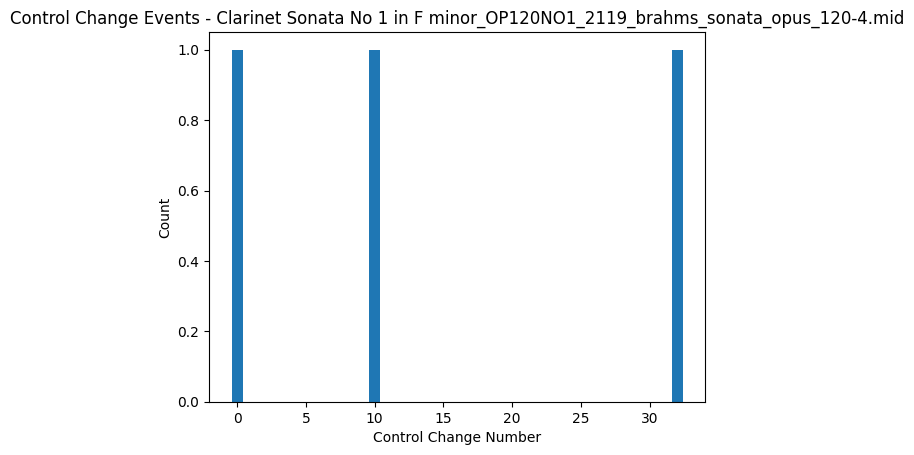

--- Horn Trio in E-flat major_OP40_2161_bra40_4.mid ---
Number of instruments: 4
Duration: 388.94360285937506 seconds


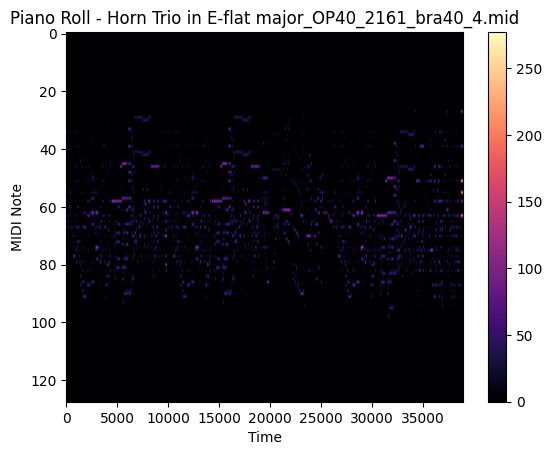

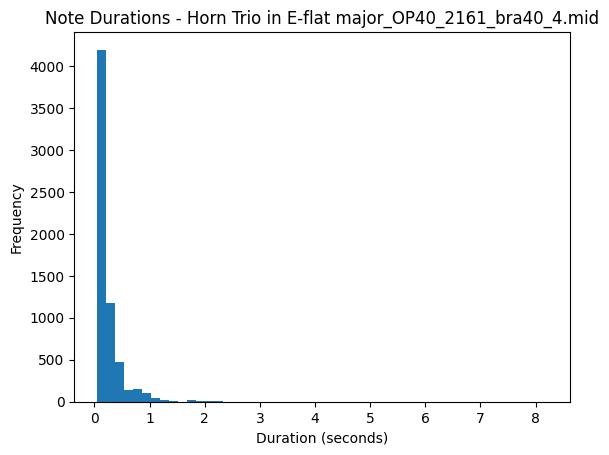

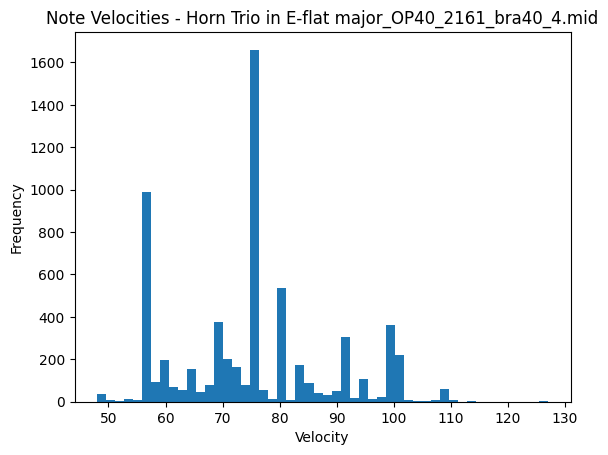

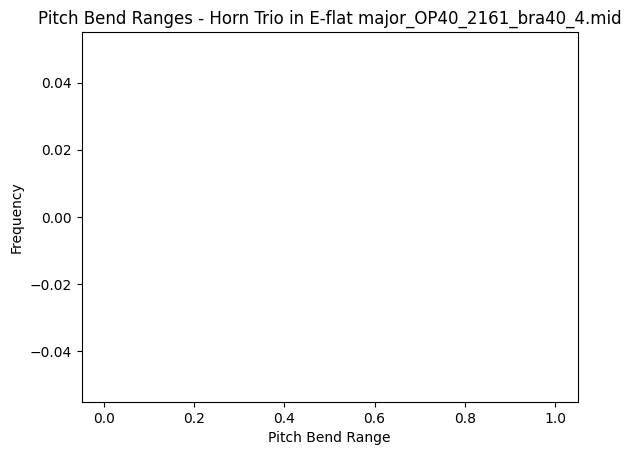

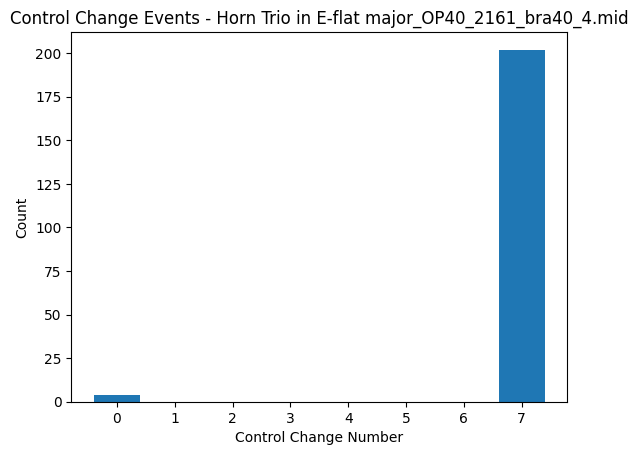

--- Piano Quartet No 1 in G minor_OP25_2149_br25m2.mid ---
Number of instruments: 9
Duration: 513.3357719999999 seconds


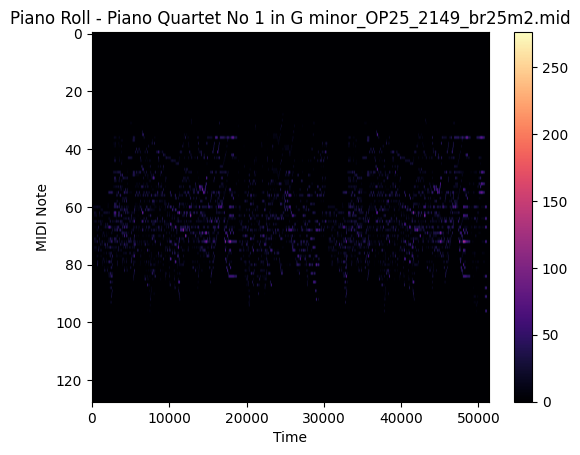

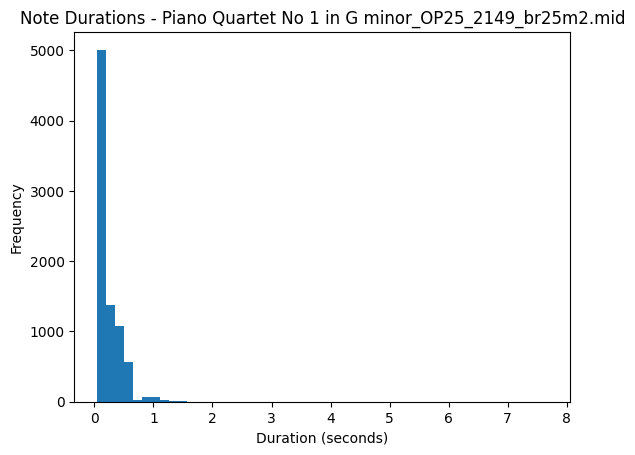

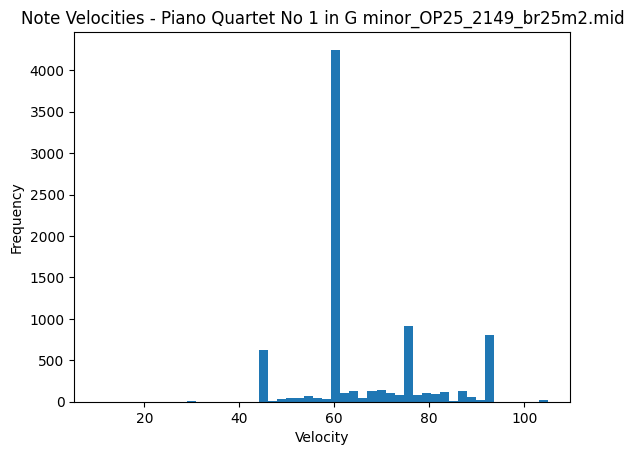

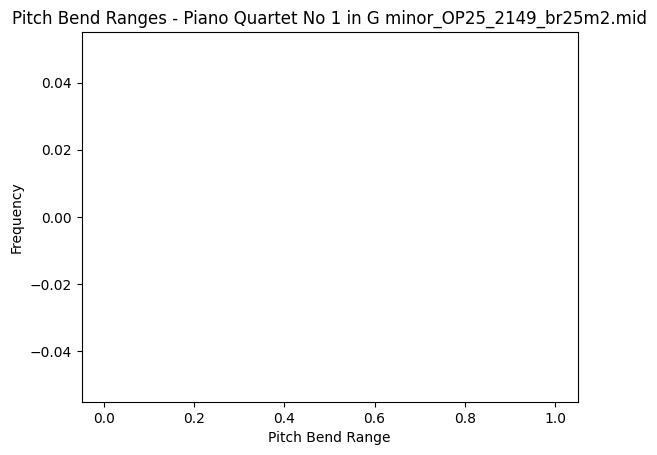

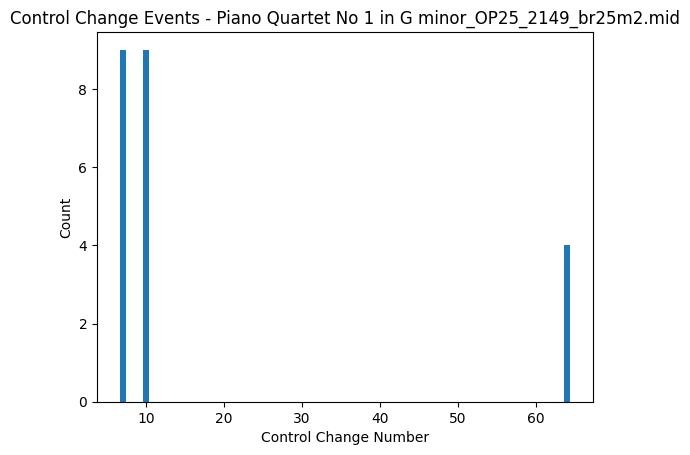

--- Clarinet Sonata No 1 in F minor_OP120NO1_2118_brahms_sonata_opus_120-3.mid ---
Number of instruments: 4
Duration: 249.1003466666667 seconds


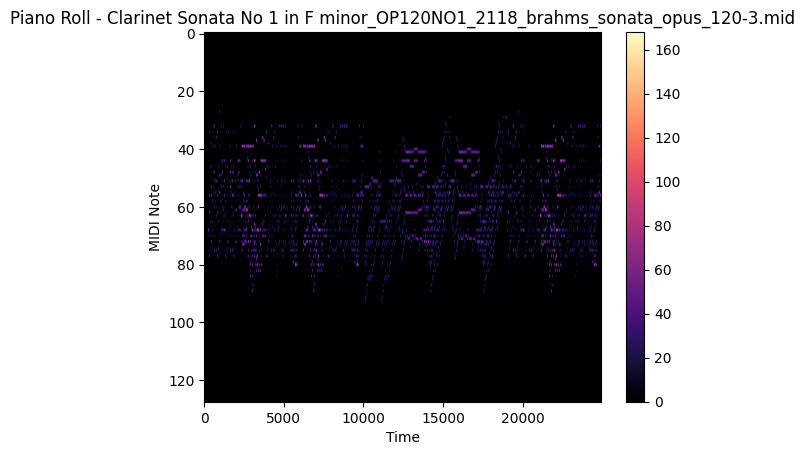

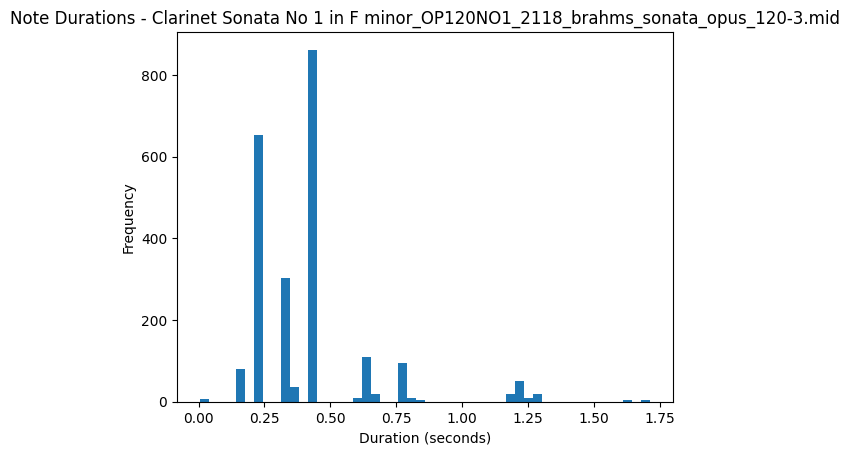

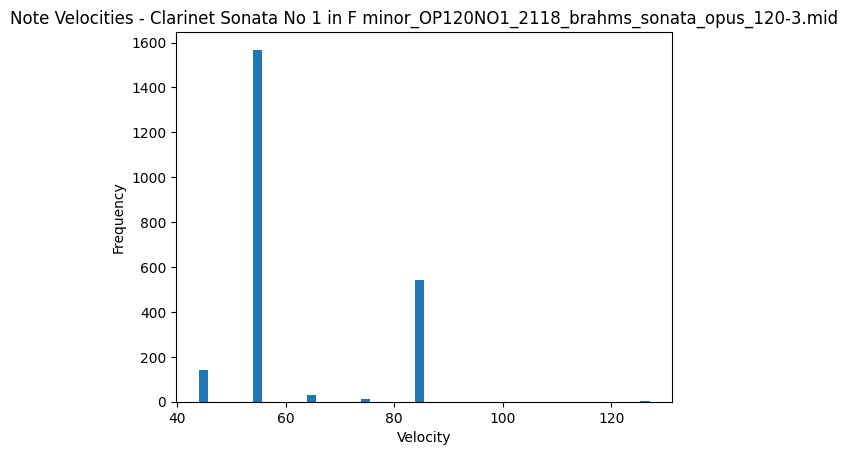

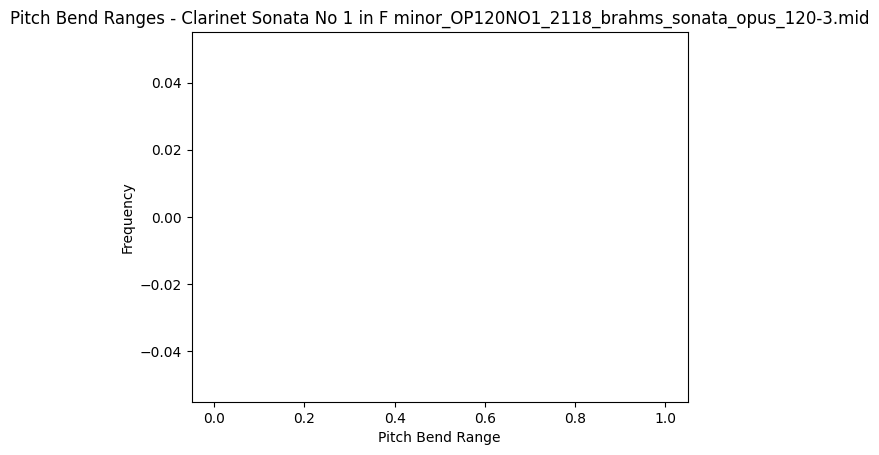

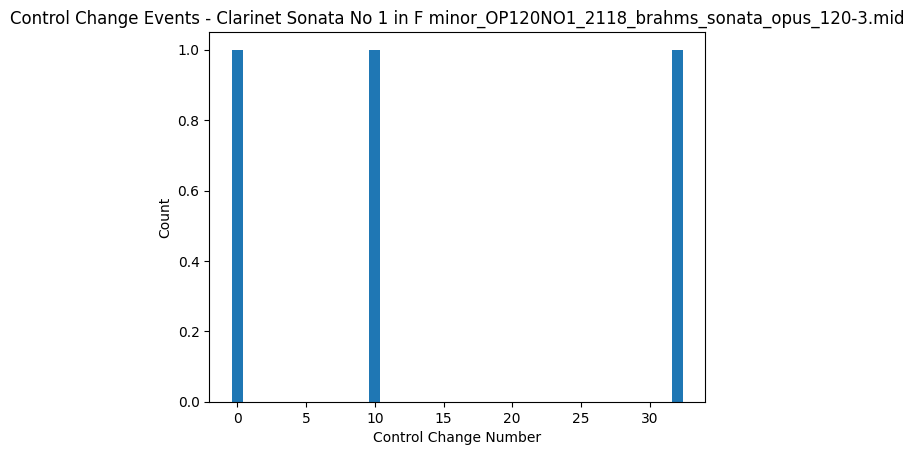

--- Horn Trio in E-flat major_OP40_2158_bra40_1.mid ---
Number of instruments: 4
Duration: 482.32519560416677 seconds


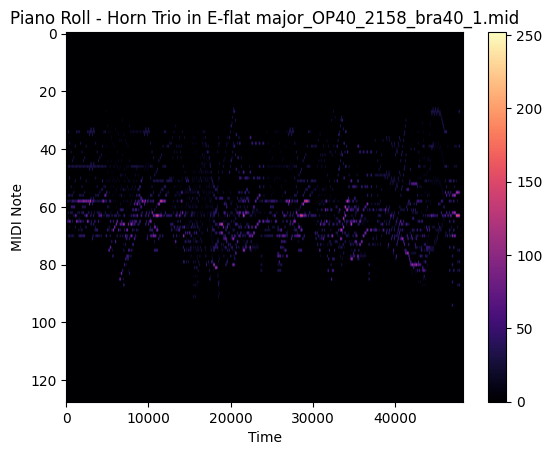

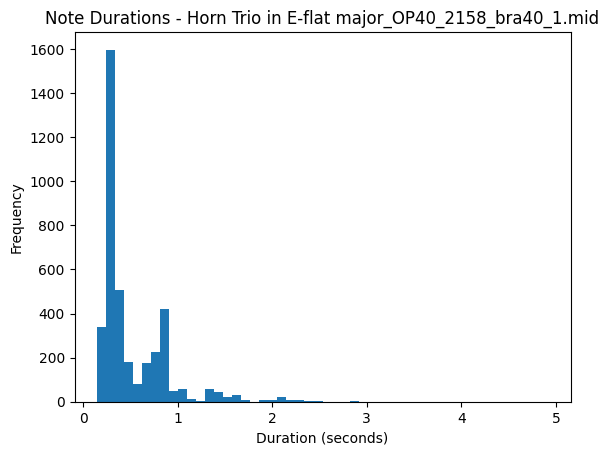

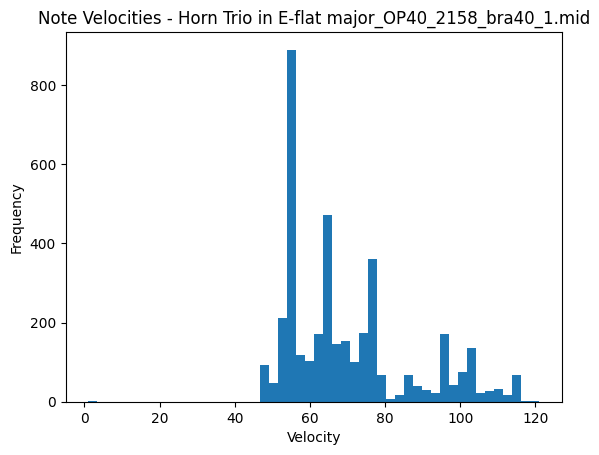

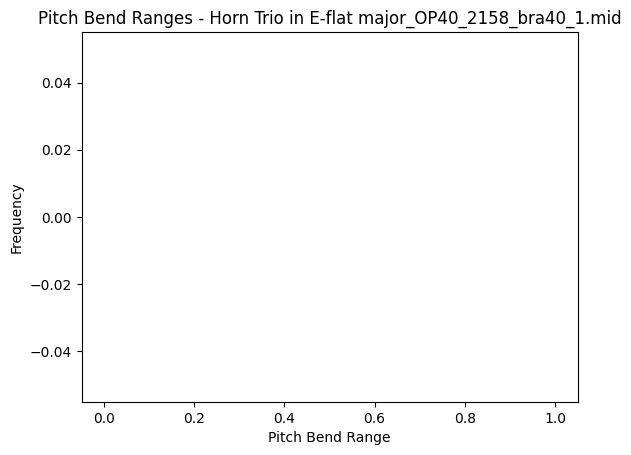

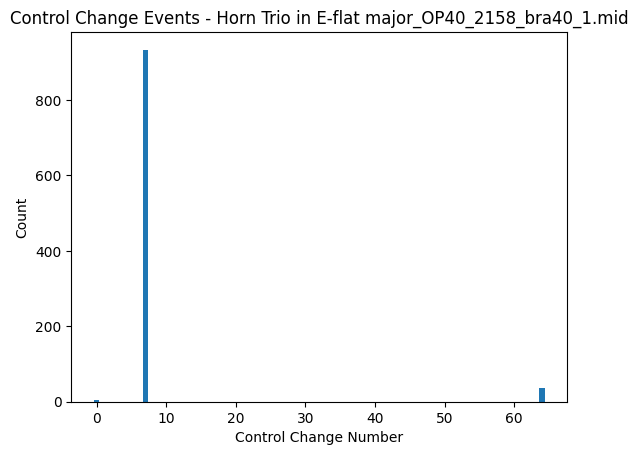

--- Clarinet Sonata No 1 in F minor_OP120NO1_2116_brahms_sonata_opus_120-1.mid ---
Number of instruments: 4
Duration: 355.02916666666664 seconds


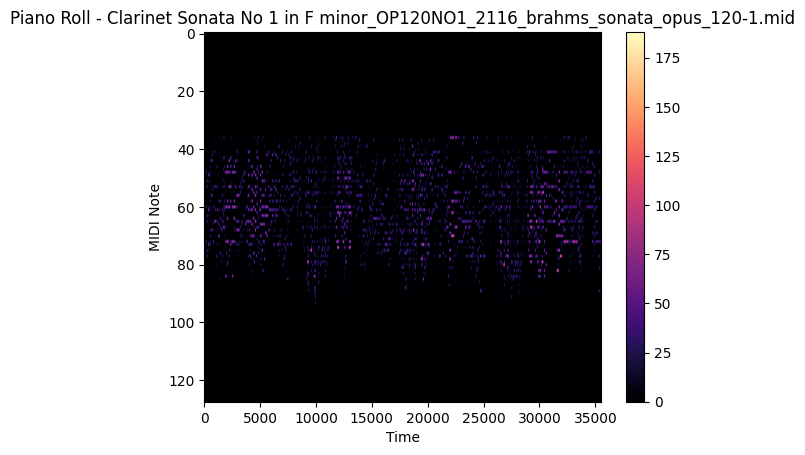

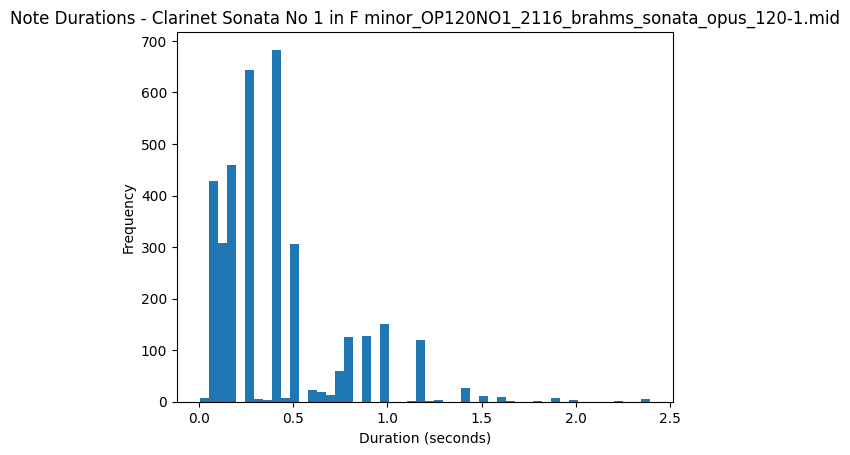

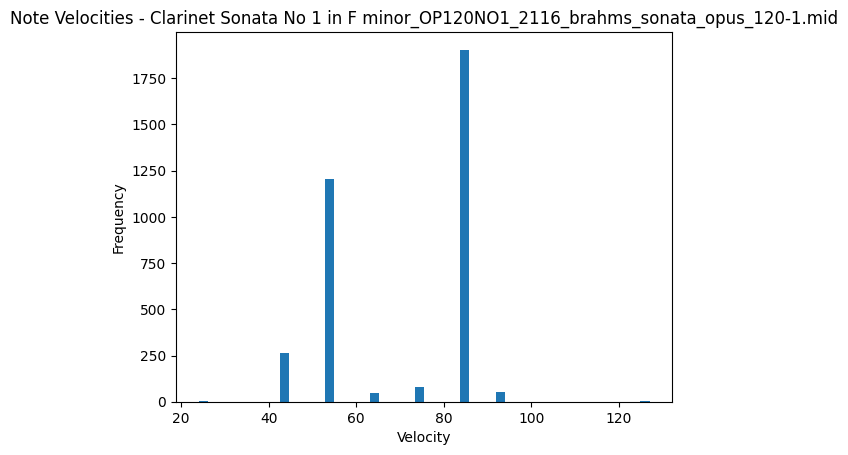

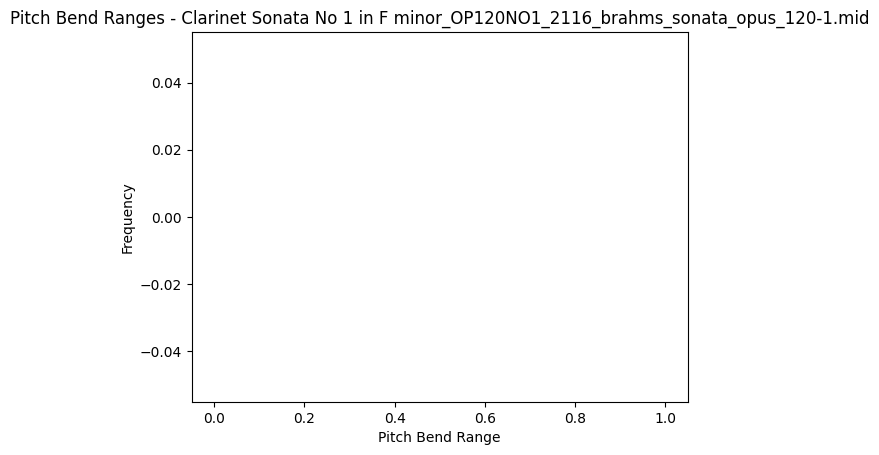

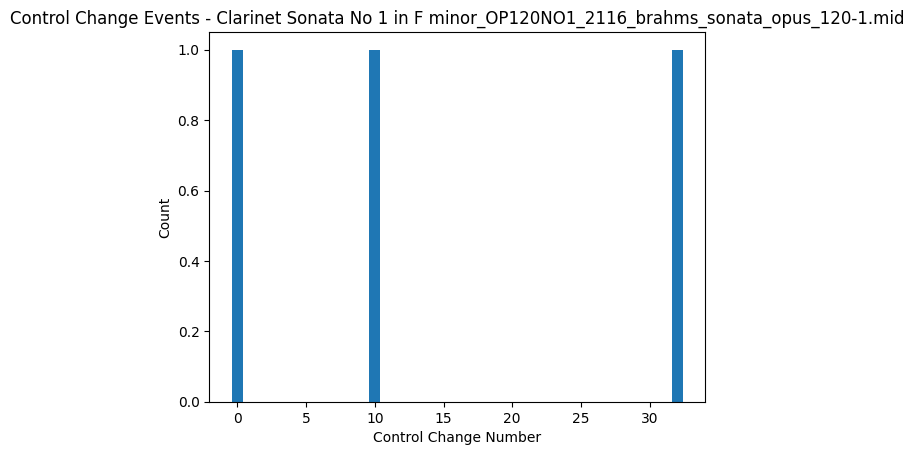

--- Serenade No 1 in D Major_OP11_2131_bra11-6.mid ---
Number of instruments: 13
Duration: 315.42825600000003 seconds


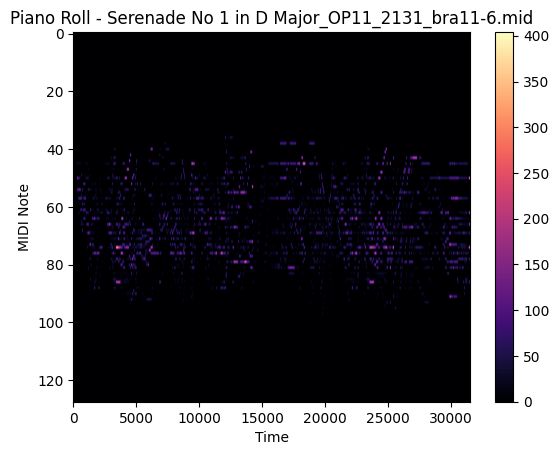

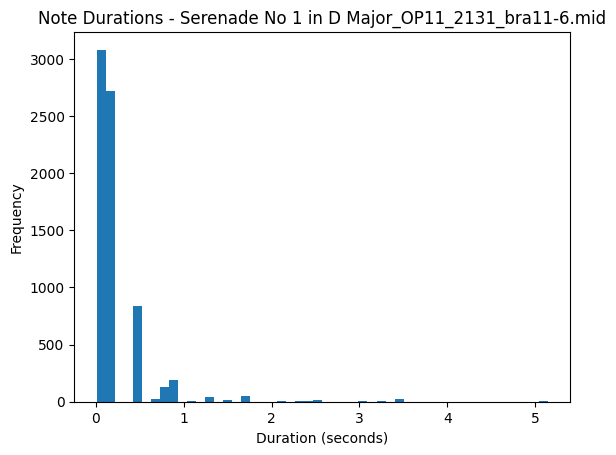

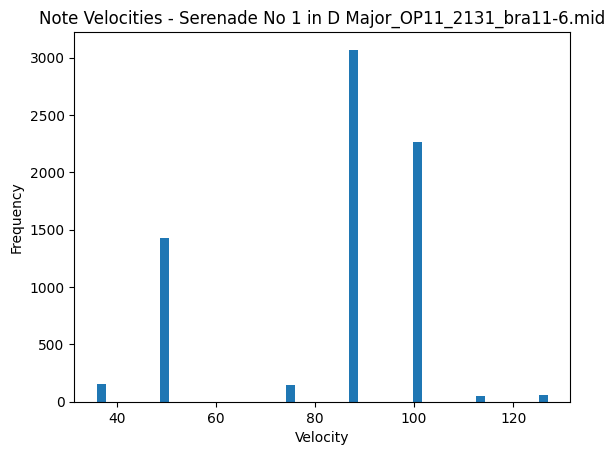

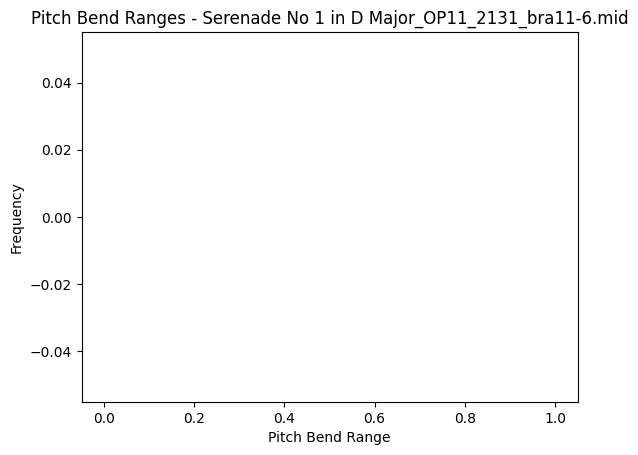

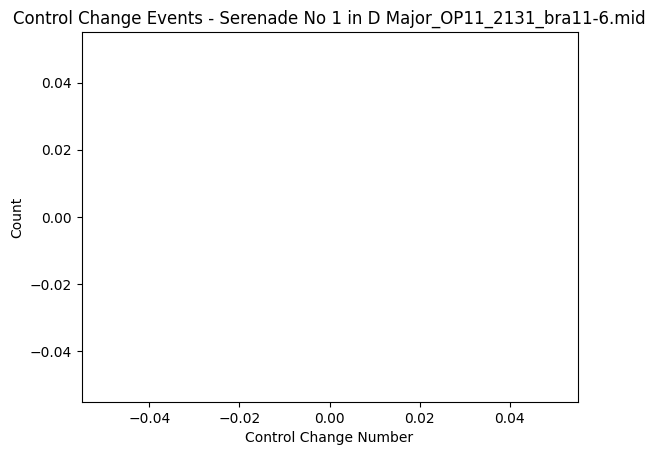

--- Trio in E-flat major_OP38_2112_jb38_1.mid ---
Number of instruments: 3
Duration: 811.635552 seconds


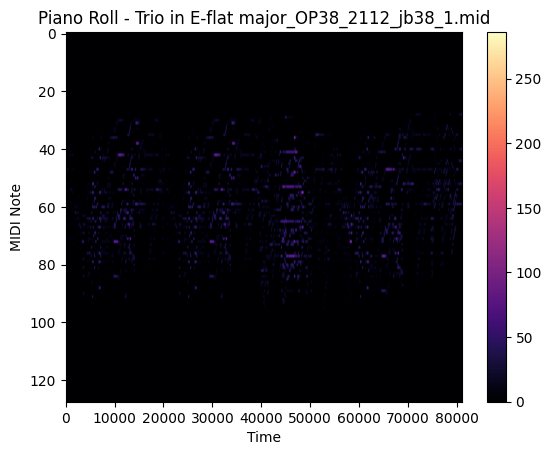

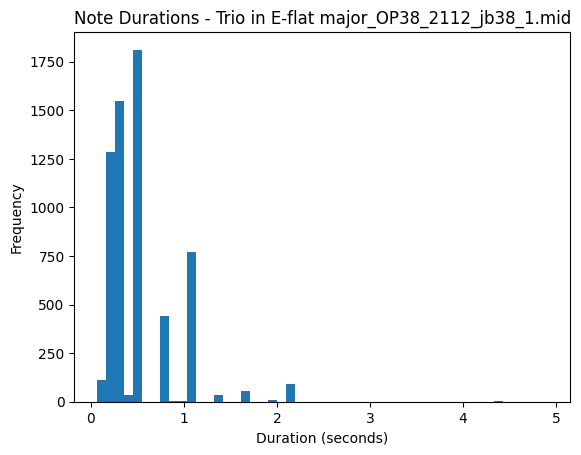

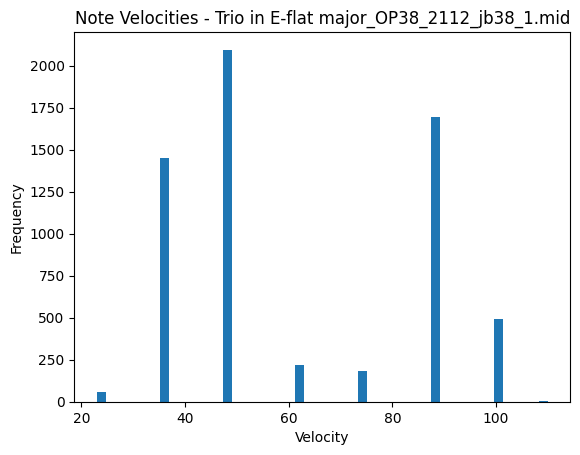

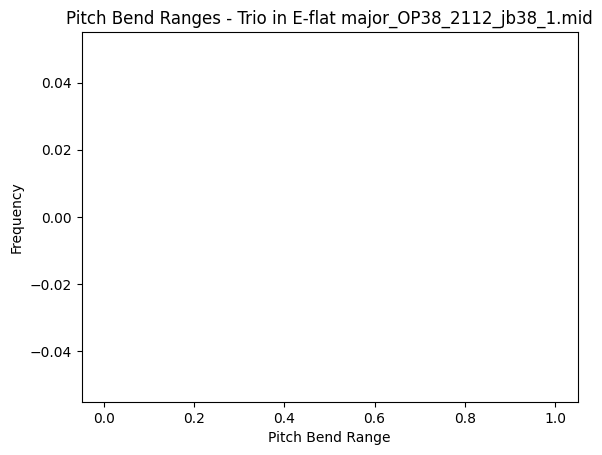

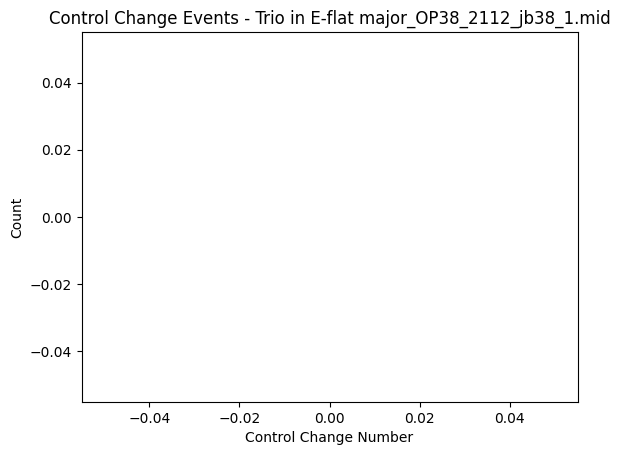

--- Piano Quartet No 1 in G minor_OP25_2150_br25m3.mid ---
Number of instruments: 8
Duration: 646.5138949999999 seconds


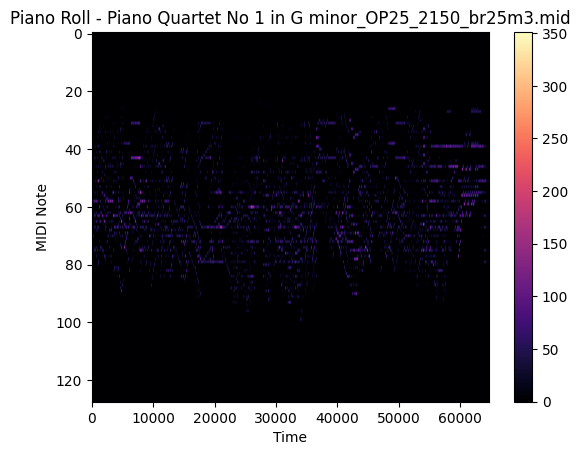

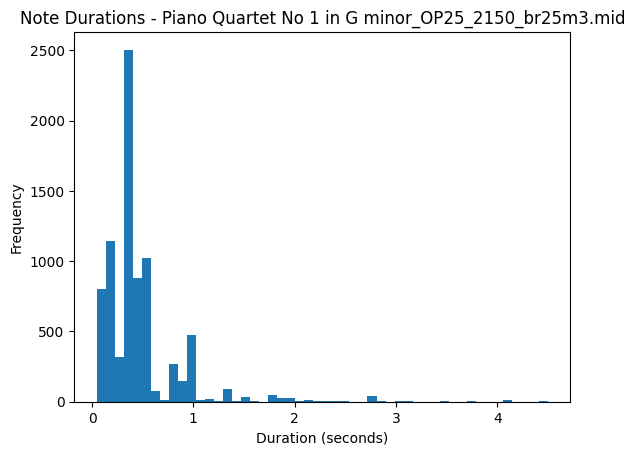

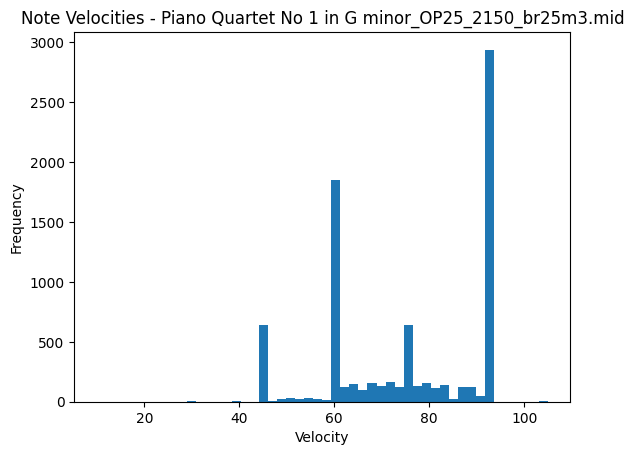

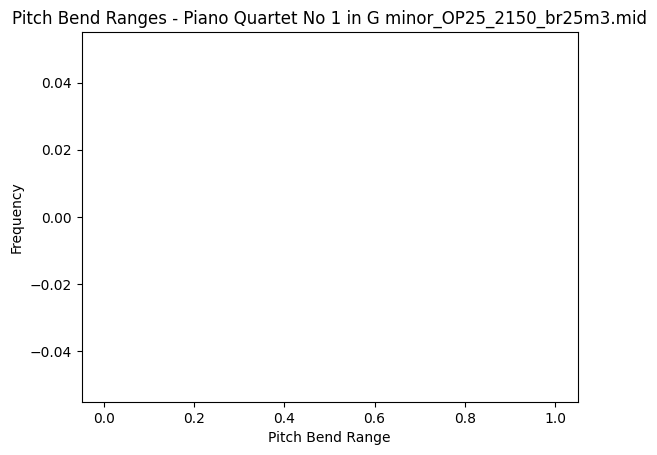

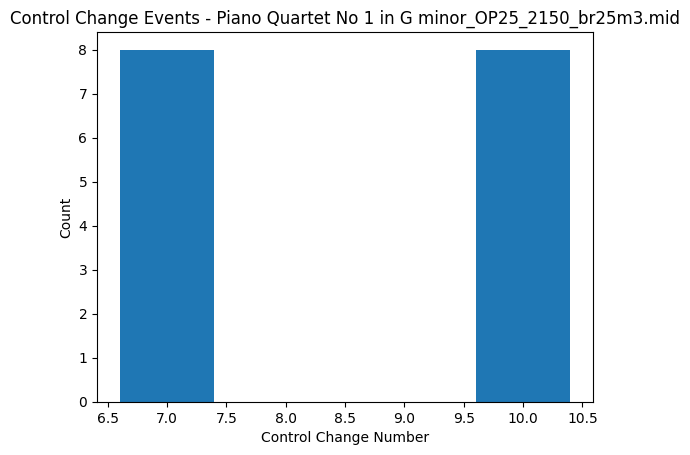

--- String Quartet in C minor_OP51NO1_2140_br51n1m4.mid ---
Number of instruments: 5
Duration: 347.055609 seconds


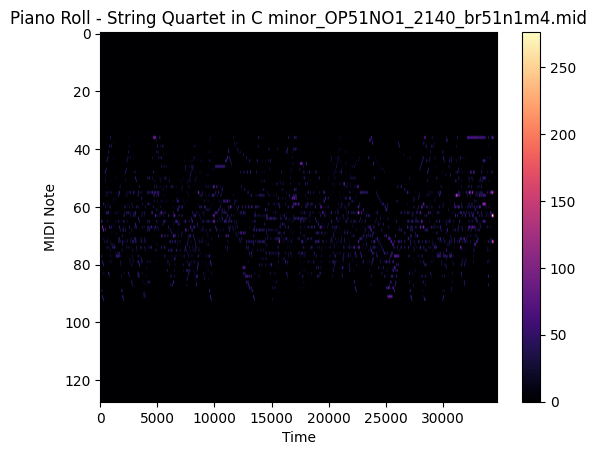

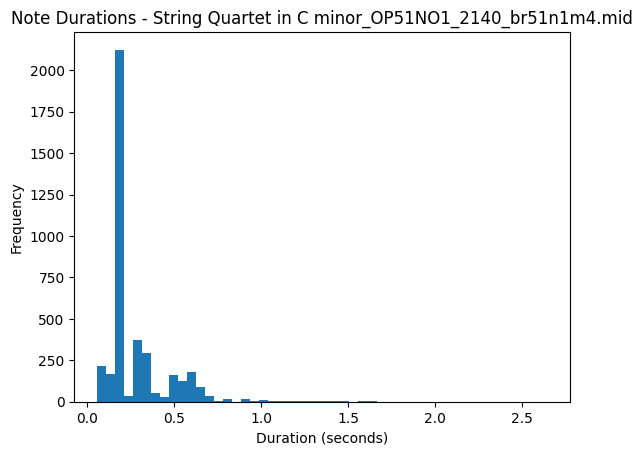

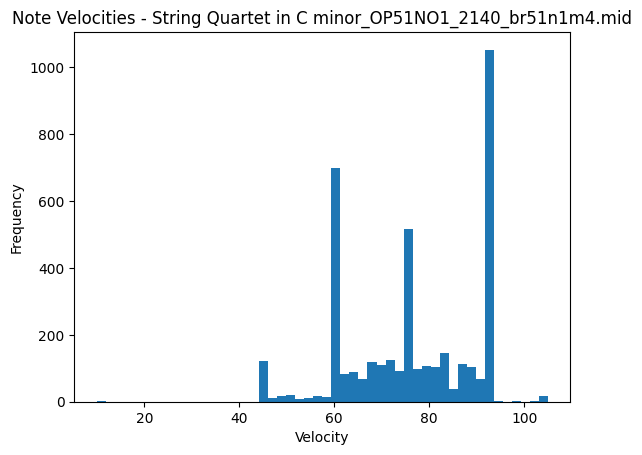

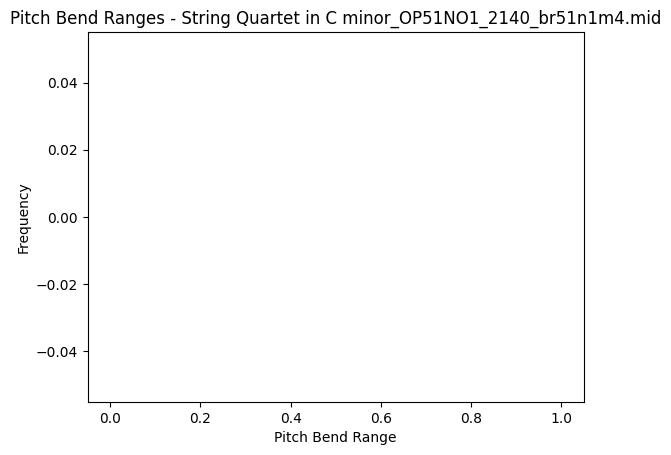

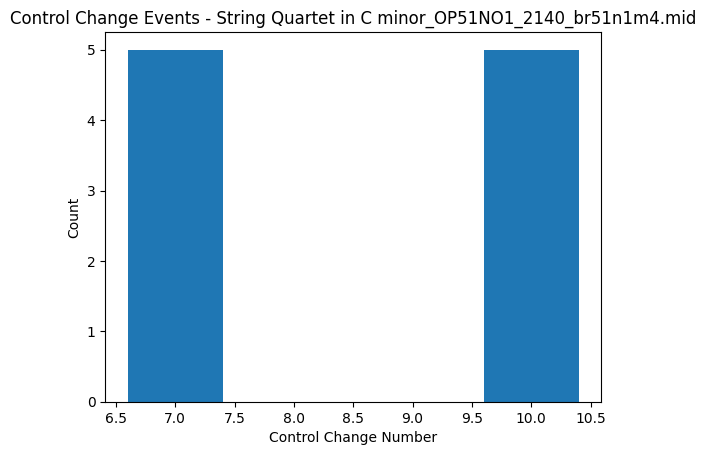

--- Serenade No 1 in D Major_OP11_2127_bra11-2.mid ---
Number of instruments: 13
Duration: 467.40000000000003 seconds


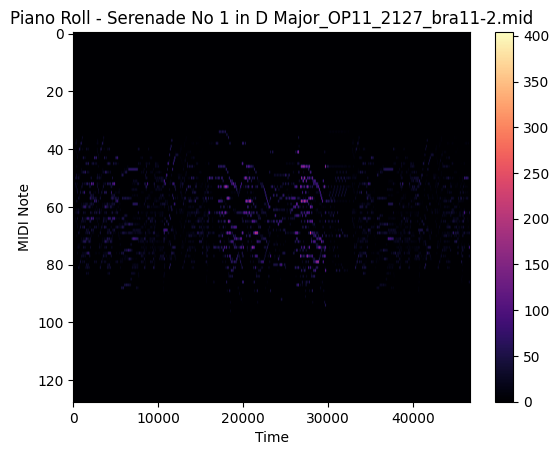

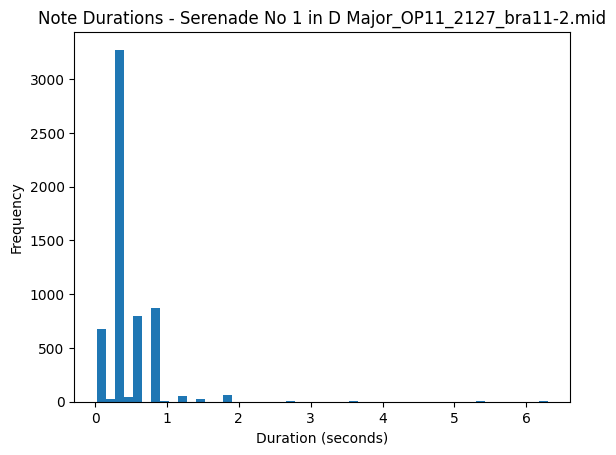

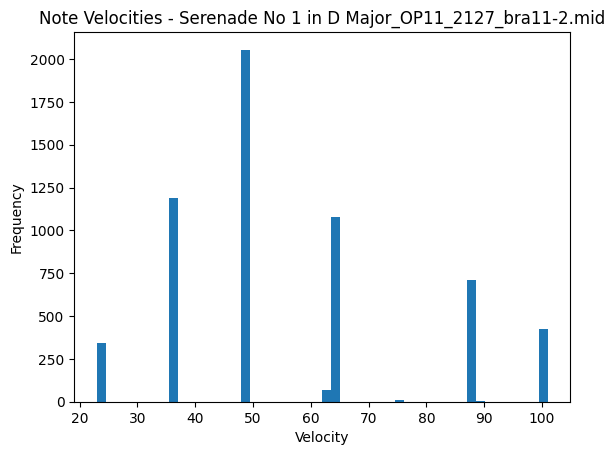

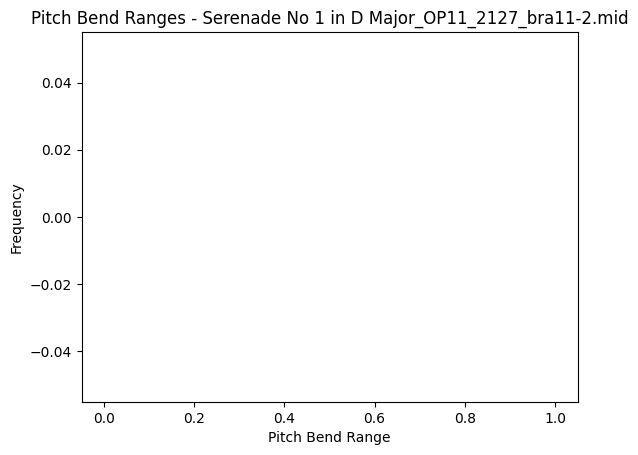

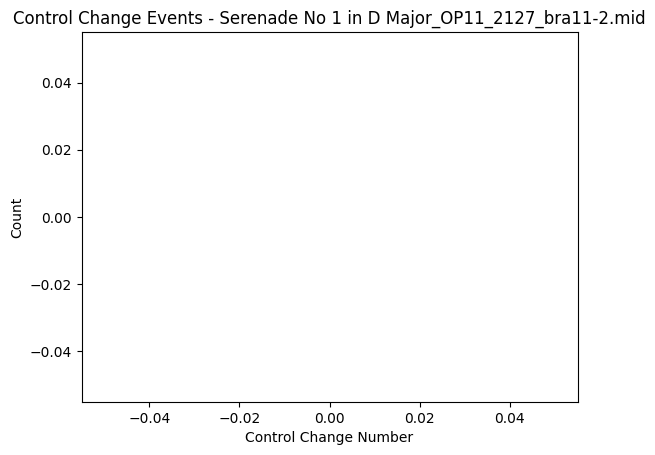

--- String Sextet No 1 in B-flat major_OP18_2154_br18m1.mid ---
Number of instruments: 13
Duration: 697.9661340000006 seconds


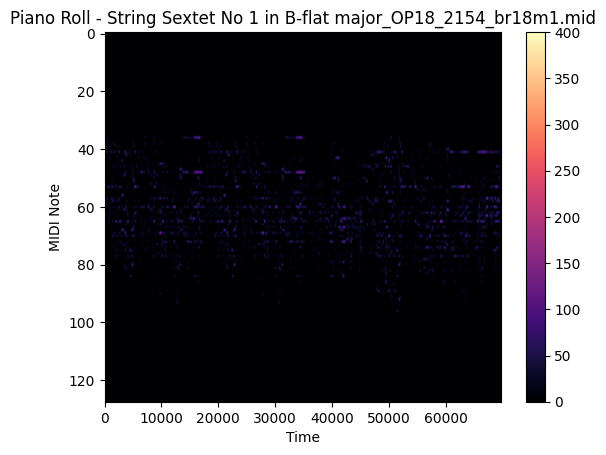

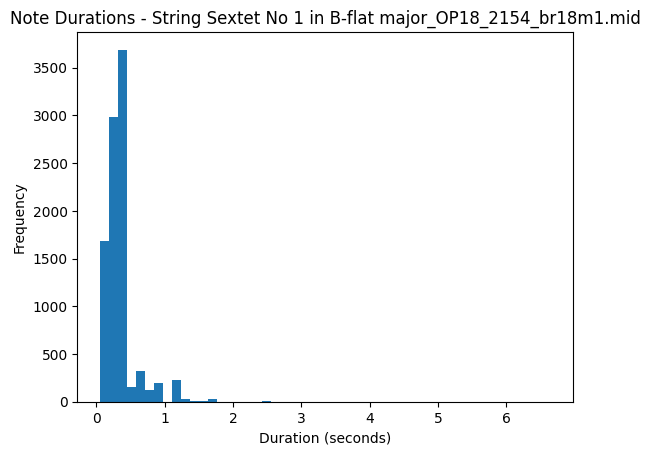

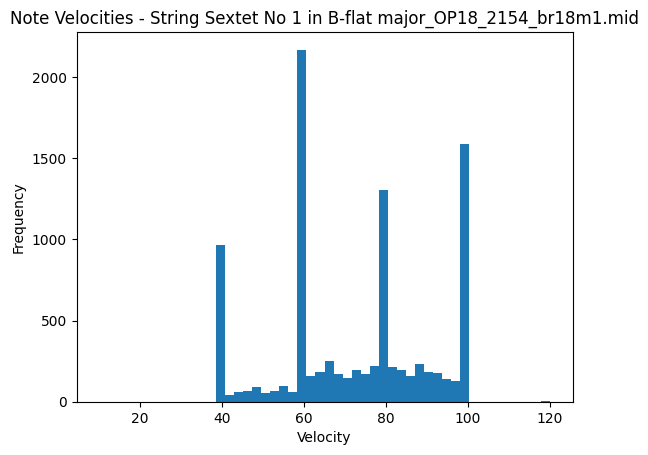

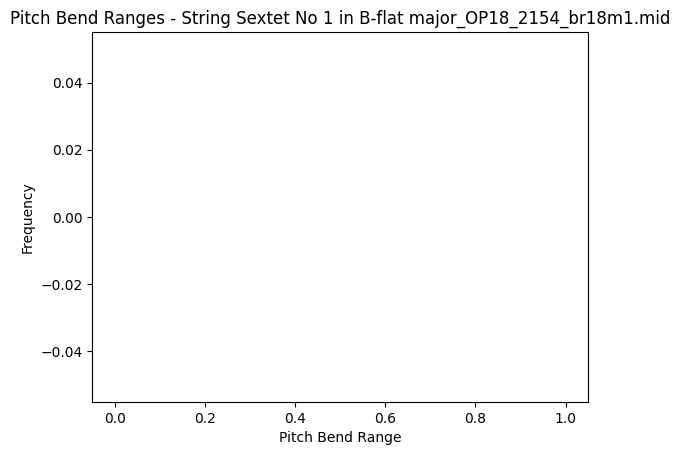

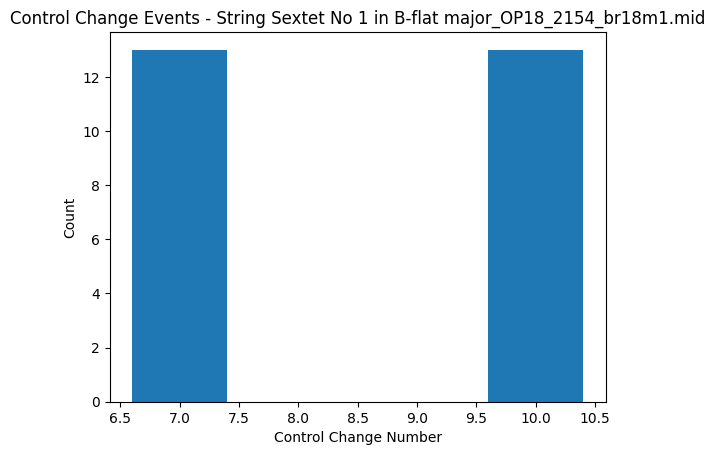

--- Horn Trio in E-flat major_OP40_2160_bra40_3.mid ---
Number of instruments: 4
Duration: 400.85726123437496 seconds


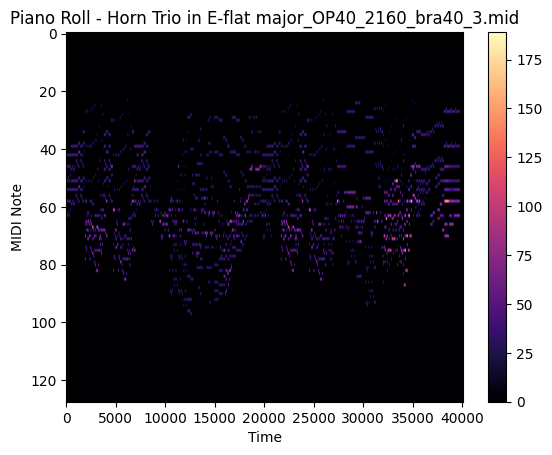

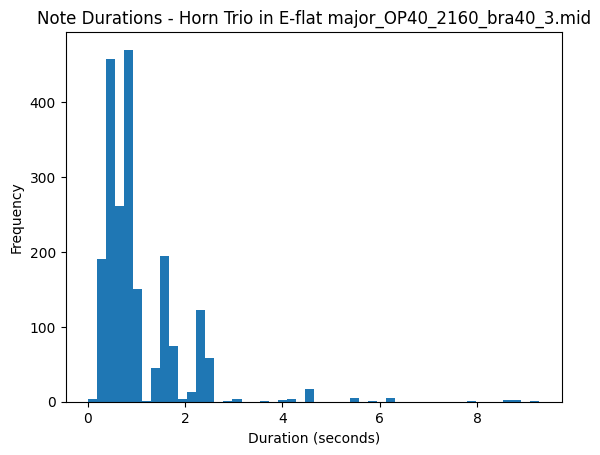

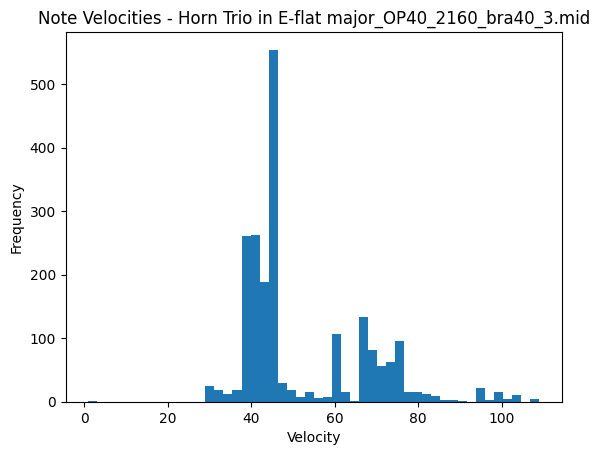

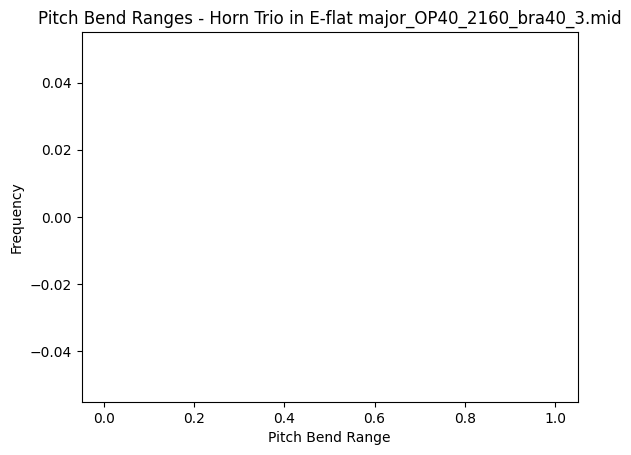

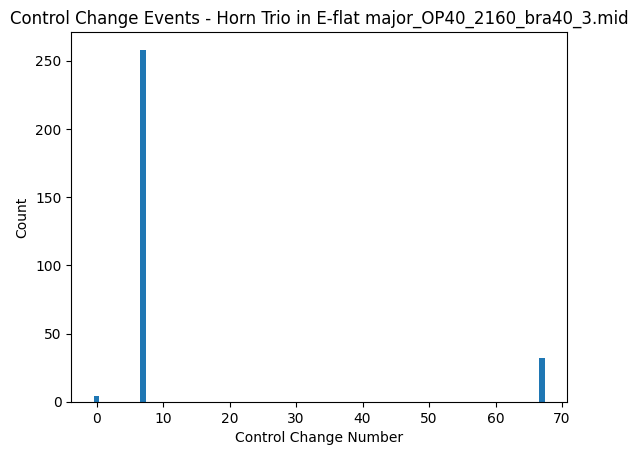

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pretty_midi

def analyze_midi_files(directory):
    # List all MIDI files in the specified directory
    midi_files = [file for file in os.listdir(directory) if file.endswith('.mid')]

    for file in midi_files:
        # Load the MIDI file
        midi_data = pretty_midi.PrettyMIDI(os.path.join(directory, file))

        # Basic information about the MIDI file
        print(f"--- {file} ---")
        print(f"Number of instruments: {len(midi_data.instruments)}")
        print(f"Duration: {midi_data.get_end_time()} seconds")

        # Plotting the piano roll representation
        piano_roll = midi_data.get_piano_roll()
        plt.figure()
        plt.imshow(piano_roll, aspect='auto', cmap='magma')
        plt.title(f"Piano Roll - {file}")
        plt.xlabel('Time')
        plt.ylabel('MIDI Note')
        plt.colorbar()

        # Histogram of note durations
        note_durations = []
        for instrument in midi_data.instruments:
            for note in instrument.notes:
                note_durations.append(note.end - note.start)

        plt.figure()
        plt.hist(note_durations, bins=50)
        plt.title(f"Note Durations - {file}")
        plt.xlabel('Duration (seconds)')
        plt.ylabel('Frequency')

        # Histogram of note velocities
        note_velocities = []
        for instrument in midi_data.instruments:
            for note in instrument.notes:
                note_velocities.append(note.velocity)

        plt.figure()
        plt.hist(note_velocities, bins=50)
        plt.title(f"Note Velocities - {file}")
        plt.xlabel('Velocity')
        plt.ylabel('Frequency')

        # Histogram of pitch bend range
        pitch_bend_ranges = []
        for instrument in midi_data.instruments:
            for pitch_bend in instrument.pitch_bends:
                pitch_bend_ranges.append(pitch_bend.pitch_max - pitch_bend.pitch_min)

        plt.figure()
        plt.hist(pitch_bend_ranges, bins=50)
        plt.title(f"Pitch Bend Ranges - {file}")
        plt.xlabel('Pitch Bend Range')
        plt.ylabel('Frequency')

        # Histogram of control change events (e.g., modulation, expression, sustain)
        control_change_counts = {}
        for instrument in midi_data.instruments:
            for control_change in instrument.control_changes:
                if control_change.number not in control_change_counts:
                    control_change_counts[control_change.number] = 0
                control_change_counts[control_change.number] += 1

        plt.figure()
        plt.bar(control_change_counts.keys(), control_change_counts.values())
        plt.title(f"Control Change Events - {file}")
        plt.xlabel('Control Change Number')
        plt.ylabel('Count')

        plt.show()


# Provide the path to the directory containing the MIDI files
midi_directory = 'Datasets/PS1/Brahms/'

# Analyze the MIDI files in the specified directory
analyze_midi_files(midi_directory)
